In [1]:
import shutup; shutup.please()
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore") 
from imputation_utils import char_groupings, char_maps, char_map
import numpy as np
data = np.load('../data/raw_rank_trunk_chars.npz')
percentile_rank_chars = data['rank_chars']
regular_chars = data['raw_chars']
chars = data['chars']
dates = data['dates']
return_panel = data['returns']
permnos = data['permnos']
rts = data['rfs']
monthly_updates = data['monthly_updates']

import importlib
mpl_toolkits = importlib.import_module('mpl_toolkits')
from plots_and_tables import appendix, section_2, section_4, section_5, section_6

# Appendix

## Table A.1: Imputation Error for Alternative Implementations

This table shows the imputation RMSE by imputation method averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the imputation error out-of-sample for masked characteristics for the three masking schemes MCAR, Block, and Logit. We report the errors on the subset of data that are not missing at the beginning, that is, these data have some prior values of the characteristics observed.

CPU times: user 9min 37s, sys: 9min 56s, total: 19min 33s
Wall time: 1h 5min 14s

In [6]:
%%time 

result = appendix.ComparisonOfModelConfigs()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, monthly_updates, char_maps)

result.run()
result.data_df

\begin{tabular}{lrrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\
\midrule
xhat-t, x_t-1, e_t-1 & 0.133 & 0.138 & 0.125 & 0.170 & 0.164 & 0.179 & 0.131 & 0.128 & 0.143 \\
xhat-t, x_t-1 & 0.136 & 0.139 & 0.130 & 0.171 & 0.167 & 0.179 & 0.136 & 0.132 & 0.154 \\
xhat-t, e_t-1 & 0.148 & 0.149 & 0.146 & 0.172 & 0.169 & 0.179 & 0.139 & 0.135 & 0.156 \\
f-t, x_t-1, e_t-1 & 0.130 & 0.135 & 0.120 & 0.168 & 0.163 & 0.177 & 0.129 & 0.127 & 0.140 \\
f-t, x_t-1 & 0.132 & 0.136 & 0.124 & 0.170 & 0.165 & 0.177 & 0.134 & 0.130 & 0.149 \\
\bottomrule
\end{tabular}

CPU times: user 9min 37s, sys: 9min 56s, total: 19min 33s
Wall time: 1h 5min 14s


,0,1,2,3,4,5,6,7,8
"xhat-t, x_t-1, e_t-1",0.13308,0.13757,0.12453,0.16973,0.16432,0.17911,0.13094,0.12811,0.14278
"xhat-t, x_t-1",0.13571,0.13871,0.13010,0.17140,0.16692,0.17925,0.13641,0.13207,0.15414
"xhat-t, e_t-1",0.14798,0.14929,0.14556,0.17249,0.16861,0.17930,0.13905,0.13493,0.15595
"f-t, x_t-1, e_t-1",0.12994,0.13525,0.11970,0.16815,0.16295,0.17718,0.12921,0.12669,0.13978
"f-t, x_t-1",0.13204,0.13633,0.12389,0.16955,0.16542,0.17677,0.13401,0.13031,0.14928


## Simulations

### Figure A.1: Errors with Missing-Completely-at-Random

This figure shows the error for different number of factors and different number of characteristics 𝐿. We mask 30% of the entries completely-at-random. We compare the EM algorithm, the XS factor model with the correct number of factors 𝐾 and the XS factor model where we select the number of factors on the validation data. The errors are relative to the true common component with significance levels (candlestick=5%, dashed line=1%, box=10%). The number of stocks equals 𝑁 = 1, 000, and each simulation is run 100 times. The number of factors is selected on a validation dataset of 10% of masked observed entries. The regularization 𝛾 is set to the average idiosyncratic variance from an iterative estimation with a starting value of 𝛾 = 10−4.

CPU times: user 30.2 s, sys: 13.5 s, total: 43.7 s
Wall time: 4h 59min 5s

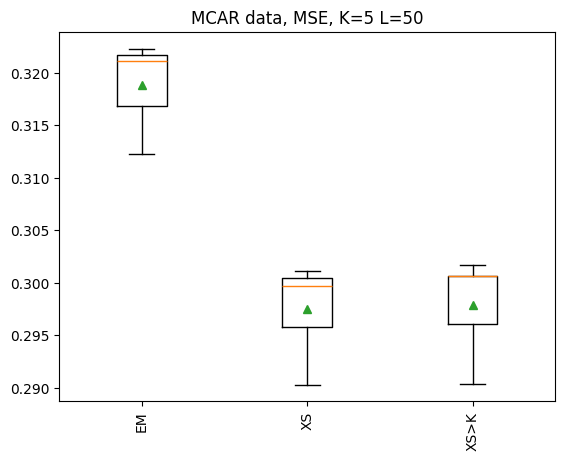

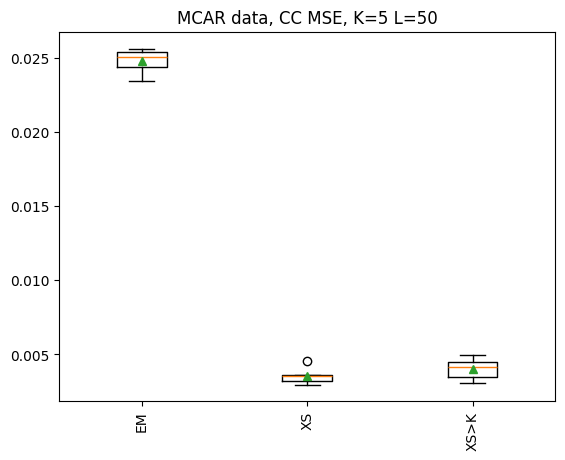

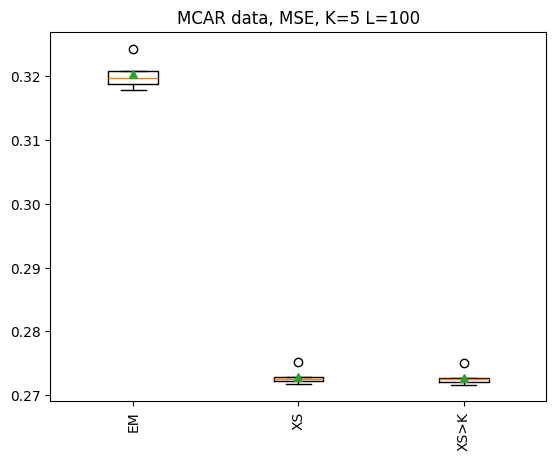

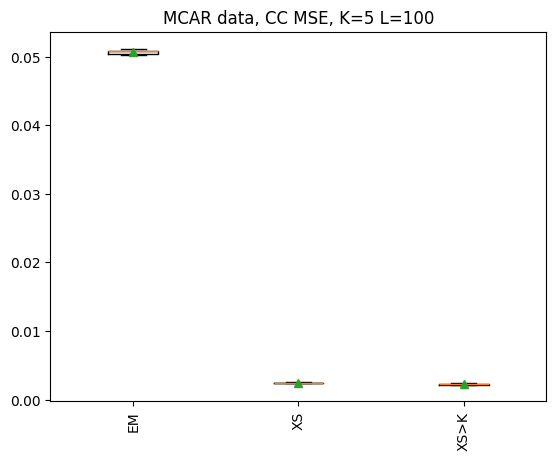

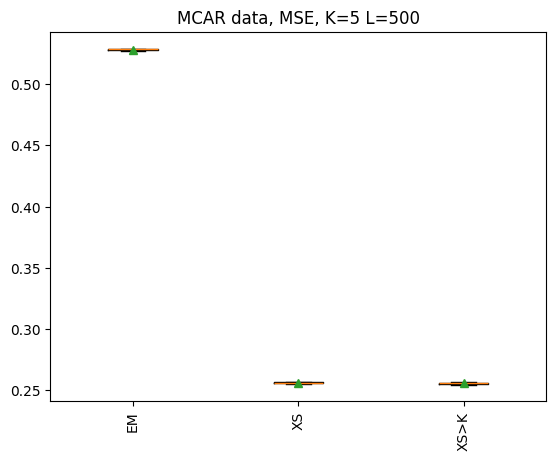

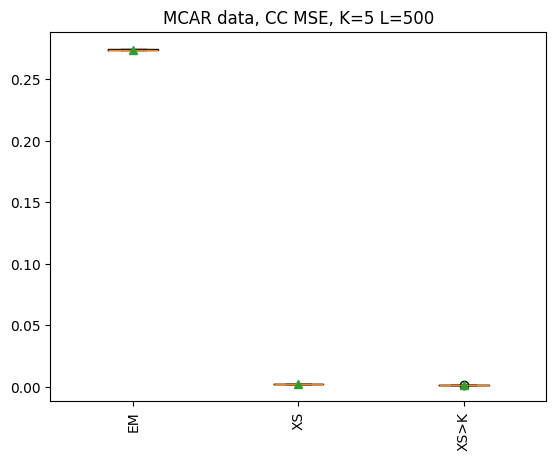

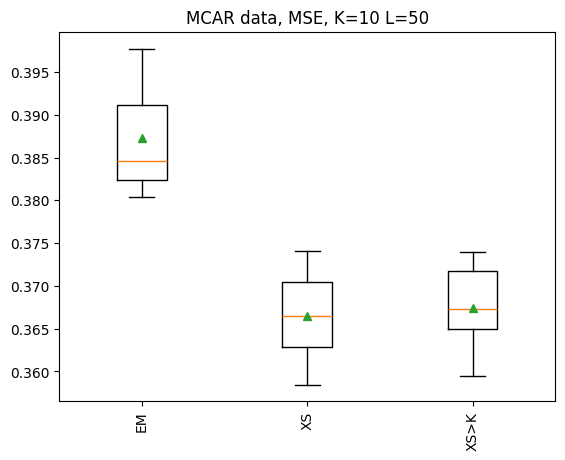

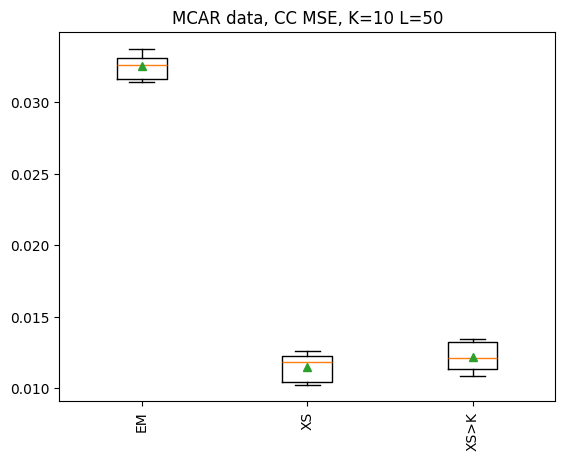

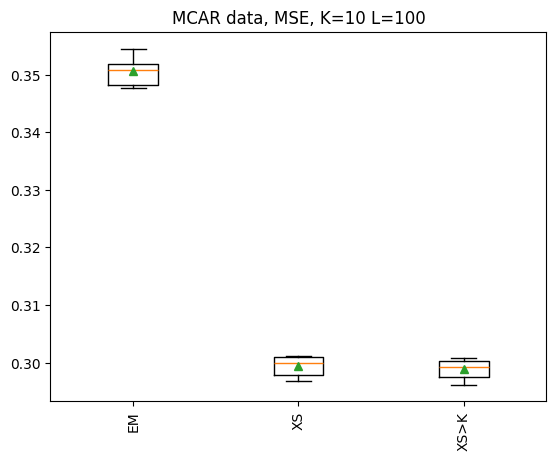

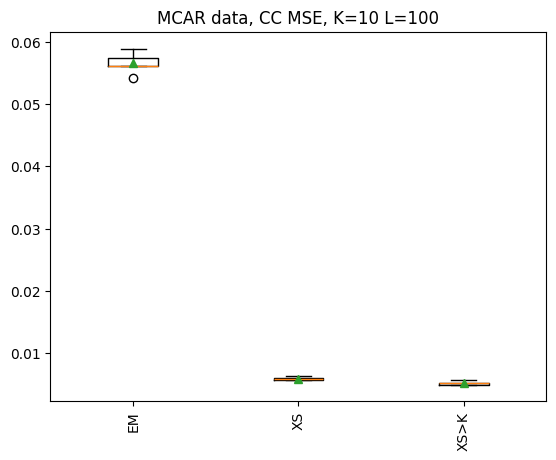

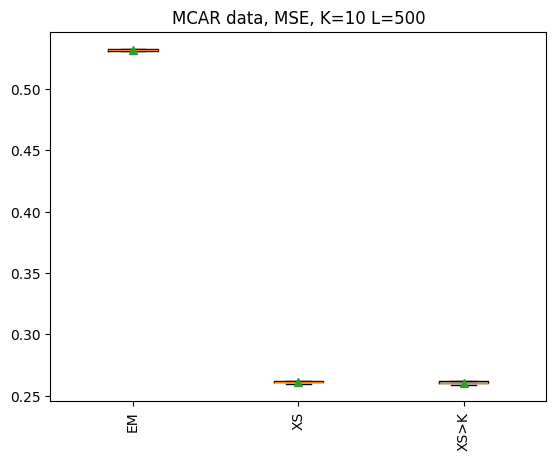

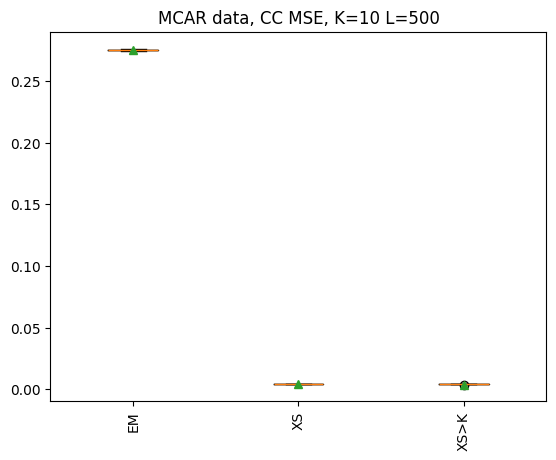

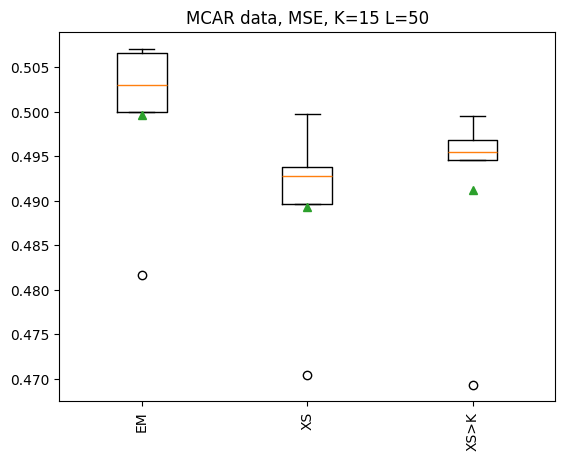

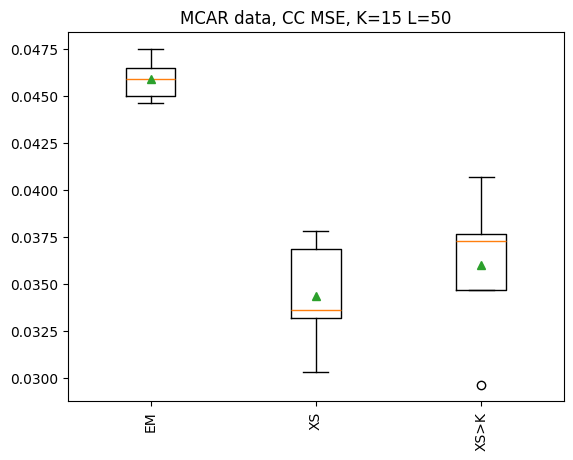

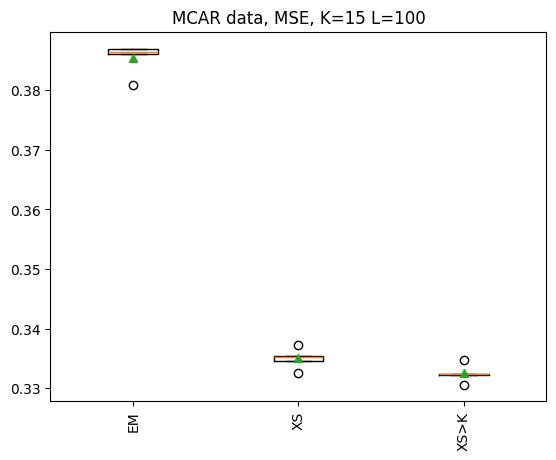

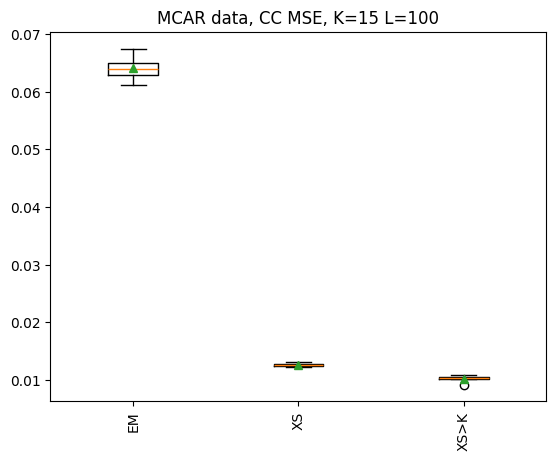

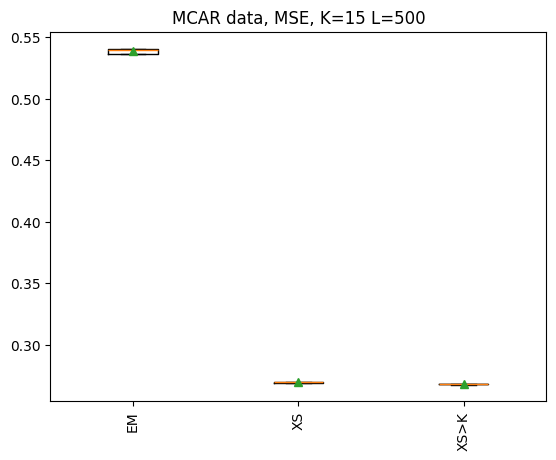

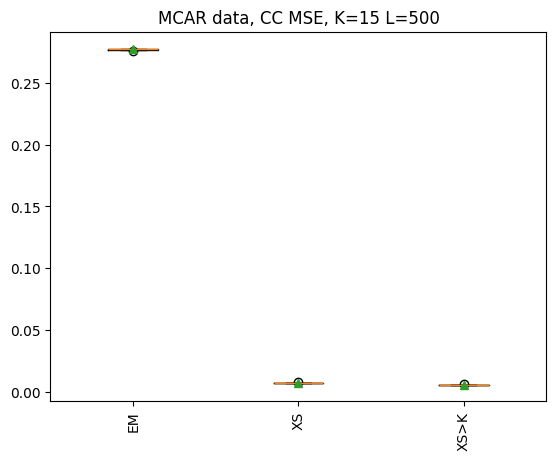

CPU times: user 30.2 s, sys: 13.5 s, total: 43.7 s
Wall time: 4h 59min 5s


In [2]:
%%time 

plot = appendix.Simulation()
plot.run('MAR')

### Figure A.2: Imputation Errors with Missing-Conditionally-at-Random

This figure shows the error for different number of factors and different number of characteristics 𝐿. We mask 30% of conditional on the loadings, where observations with larger loadings are more likely to be missing. We compare the EM algorithm, the XS factor model with the correct number of factors 𝐾 and the XS factor model, where we select the number of factors on the validation data. The errors are relative to the true common component with significance levels (candlestick=5%, dashed line=1%, box=10%). The number of stocks equals 𝑁 = 1, 000, and each simulation is run 100 times. The number of factors is selected on a validation dataset of 10% of masked observed entries. The regularization 𝛾 is set to the average idiosyncratic variance from iterative estimation with a starting value of 𝛾 = 10−4.

CPU times: user 23.7 s, sys: 10.1 s, total: 33.8 s
Wall time: 3h 42min 32s

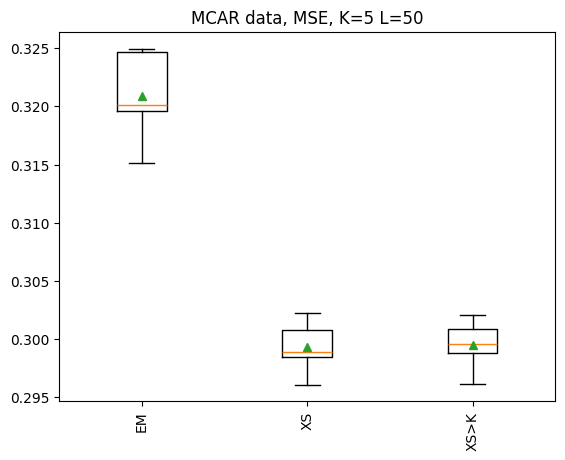

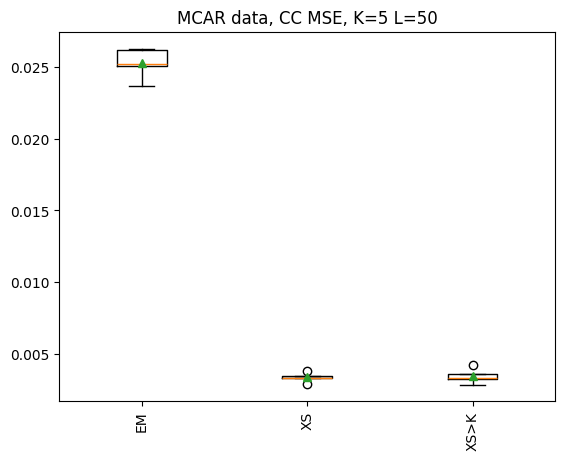

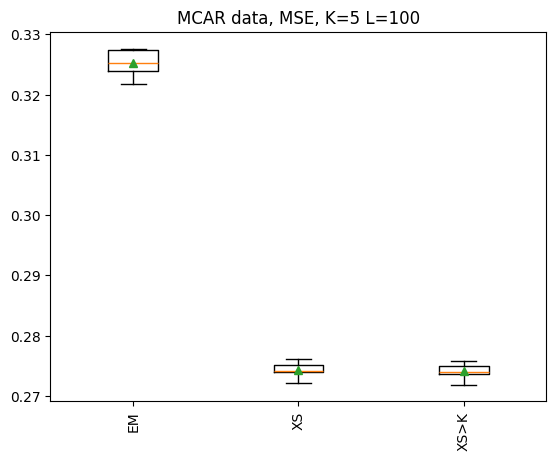

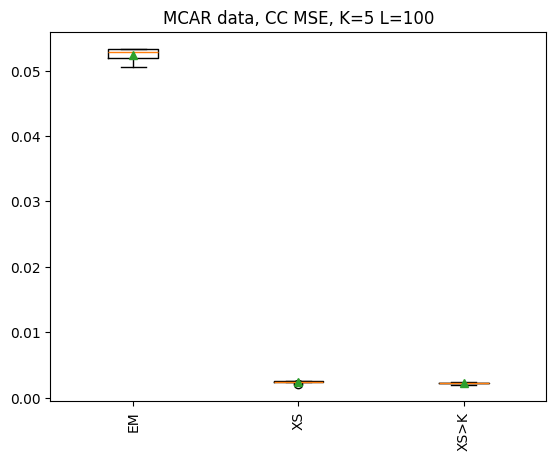

0.3 0.30002
0.3 0.30198
0.3 0.300184
0.3 0.29628
0.3 0.3032
0.3 0.2999
0.3 0.299414
0.3 0.2986
0.3 0.30236
0.3 0.30139
0.3 0.299466


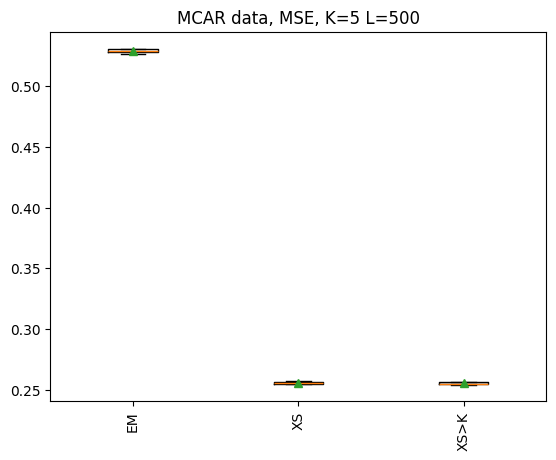

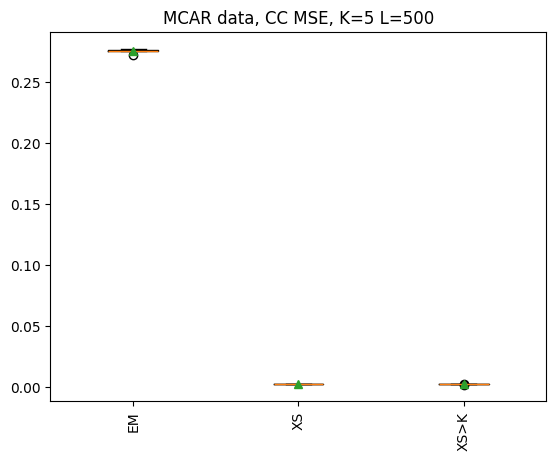

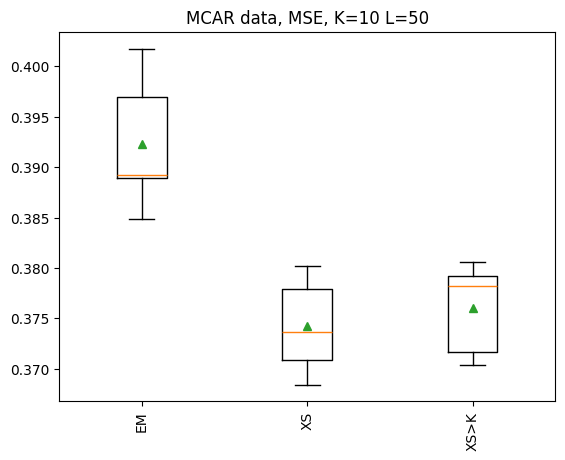

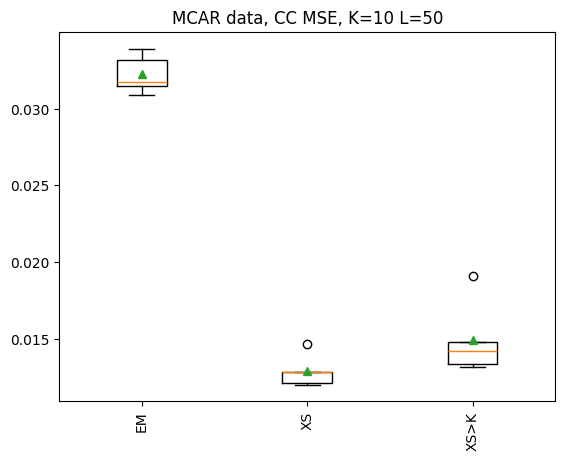

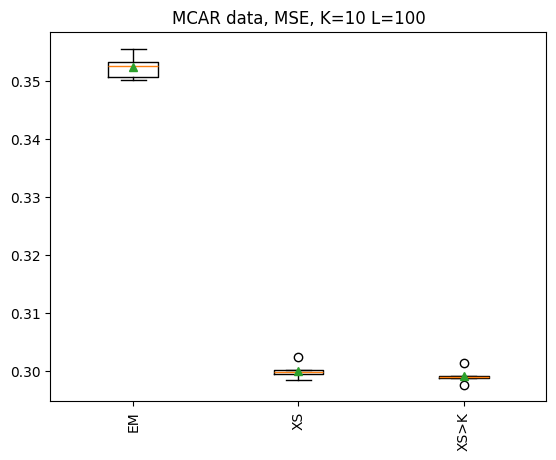

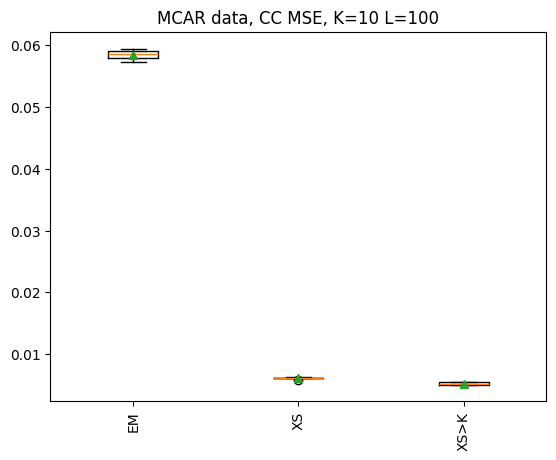

0.3 0.29844
0.3 0.30103
0.3 0.29952
0.3 0.29986
0.3 0.29856
0.3 0.29861
0.3 0.300874
0.3 0.30112
0.3 0.30033
0.3 0.299272


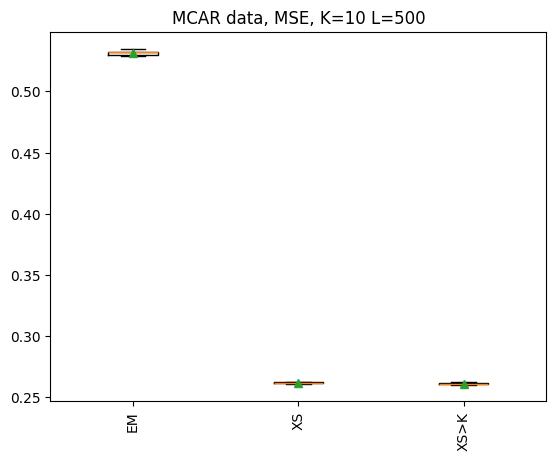

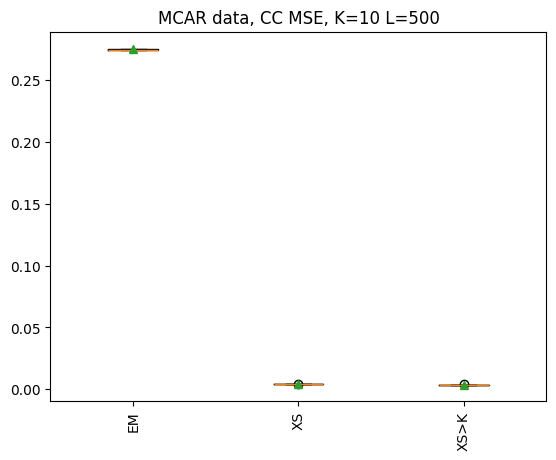

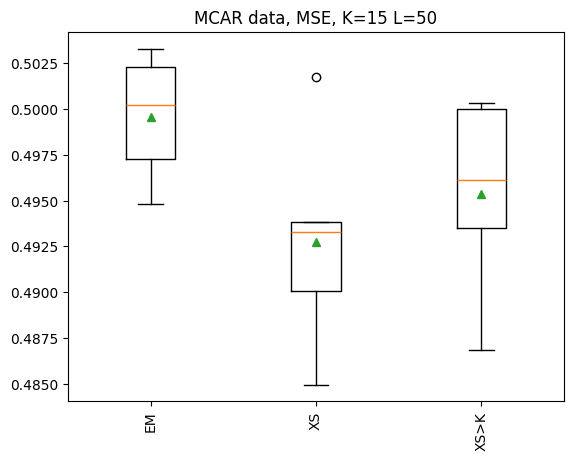

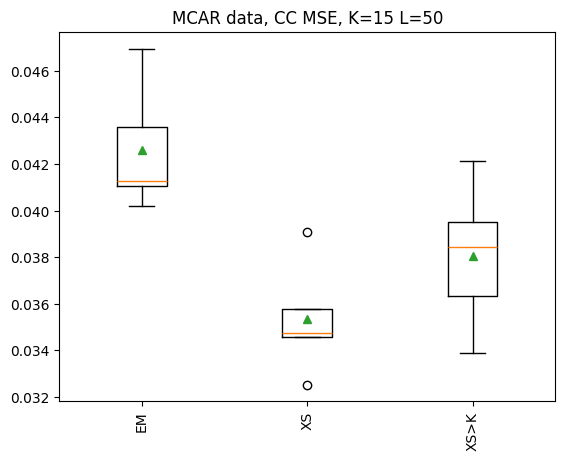

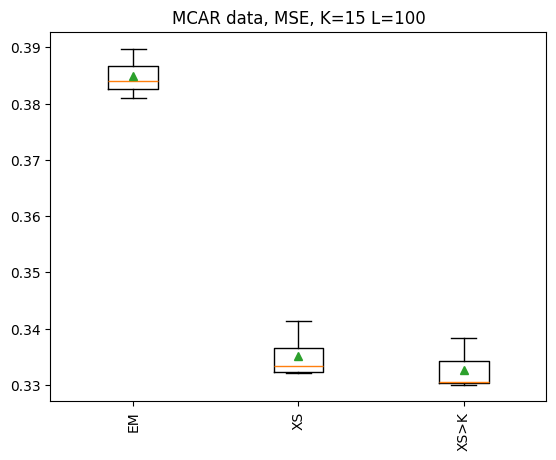

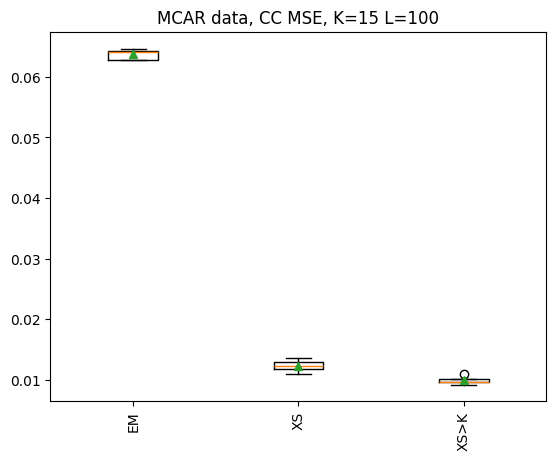

0.3 0.30024
0.3 0.30129
0.3 0.29915
0.3 0.299446
0.3 0.29892
0.3 0.30062
0.3 0.299748
0.3 0.30106
0.3 0.29821
0.3 0.29971


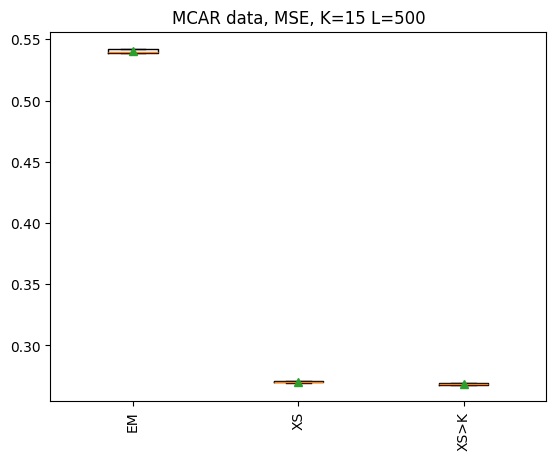

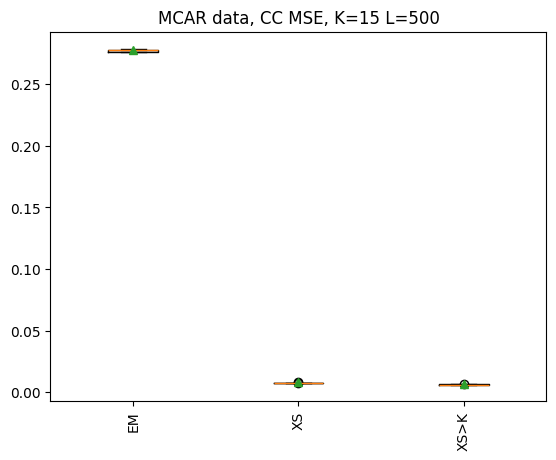

CPU times: user 23.7 s, sys: 10.1 s, total: 33.8 s
Wall time: 3h 42min 32s


In [3]:
%%time 

plot = appendix.Simulation()
plot.run('Lmbda')

## Table C.2: Missing by Characteristic Quintiles


In [4]:
%%time 

plot = section_2.MssingByQuintile()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
display(plot.data_df)
plot.run()

,ALL,ME Quintile 1,ME Quintile 2,ME Quintile 3,ME Quintile 4,ME Quintile 5,Char Quintile 1,Char Quintile 2,Char Quintile 3,Char Quintile 4,Char Quintile 5
A2ME,0.014493,0.038028,0.014353,0.009867,0.005321,0.005371,0.038028,0.014353,0.009867,0.005321,0.005371
AC,0.236396,0.209084,0.314586,0.269956,0.215723,0.173020,0.209084,0.314586,0.269956,0.215723,0.173020
AT,0.014493,0.038028,0.014353,0.009867,0.005321,0.005371,0.038028,0.014353,0.009867,0.005321,0.005371
ATO,0.035002,0.073661,0.044453,0.030145,0.016827,0.010802,0.073661,0.044453,0.030145,0.016827,0.010802
B2M,0.014299,0.038028,0.014232,0.009021,0.005321,0.005371,0.038028,0.014232,0.009021,0.005321,0.005371
BETA_d,0.175771,0.218279,0.251782,0.210230,0.137671,0.062650,0.218279,0.251782,0.210230,0.137671,0.062650
BETA_m,0.116525,0.137000,0.177551,0.142026,0.087309,0.039823,0.137000,0.177551,0.142026,0.087309,0.039823
C2A,0.015138,0.039851,0.015020,0.010250,0.005462,0.005612,0.039851,0.015020,0.010250,0.005462,0.005612
CF2B,0.016454,0.044459,0.016332,0.010189,0.006064,0.005792,0.044459,0.016332,0.010189,0.006064,0.005792
CF2P,0.015784,0.042452,0.015787,0.009565,0.005863,0.005792,0.042452,0.015787,0.009565,0.005863,0.005792


\begin{tabular}{lrrrrrrrrrrr}
\toprule
 & ALL & ME Quintile 1 & ME Quintile 2 & ME Quintile 3 & ME Quintile 4 & ME Quintile 5 & Char Quintile 1 & Char Quintile 2 & Char Quintile 3 & Char Quintile 4 & Char Quintile 5 \\
\midrule
A2ME & 0.0144925197 & 0.0380283421 & 0.0143534874 & 0.0098670963 & 0.0053212851 & 0.0053711720 & 0.0380283421 & 0.0143534874 & 0.0098670963 & 0.0053212851 & 0.0053711720 \\
AC & 0.2363963629 & 0.2090842071 & 0.3145856465 & 0.2699556988 & 0.2157228916 & 0.1730198814 & 0.2090842071 & 0.3145856465 & 0.2699556988 & 0.2157228916 & 0.1730198814 \\
AT & 0.0144925197 & 0.0380283421 & 0.0143534874 & 0.0098670963 & 0.0053212851 & 0.0053711720 & 0.0380283421 & 0.0143534874 & 0.0098670963 & 0.0053212851 & 0.0053711720 \\
ATO & 0.0350024013 & 0.0736607143 & 0.0444534168 & 0.0301449859 & 0.0168273092 & 0.0108024691 & 0.0736607143 & 0.0444534168 & 0.0301449859 & 0.0168273092 & 0.0108024691 \\
B2M & 0.0142988018 & 0.0380283421 & 0.0142323610 & 0.0090213451 & 0.0053212851 & 0.00

## Table C.3: Lengths of Missing Blocks

This table shows the number of missing blocks and their mean and median length for each characteristic.

In [5]:
%%time 

plot = section_2.MssingBlockLengths()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
display(plot.data_df)
plot.run()

  0%|          | 0/59 [00:00<?, ?it/s]

,number of gaps,mean length,median length
A2ME,457,3.717724,3.0
AC,450,4.173333,3.0
AT,448,3.810268,3.0
ATO,222,5.855856,4.0
B2M,452,3.652655,3.0
BETA_d,18,9.722222,5.5
BETA_m,25,9.960000,6.0
C2A,422,3.800948,3.0
CF2B,485,3.793814,3.0
CF2P,459,3.697168,3.0


\begin{tabular}{lrrr}
\toprule
 & number of gaps & mean length & median length \\
\midrule
A2ME & 457 & 3.7177242888 & 3.0000000000 \\
AC & 450 & 4.1733333333 & 3.0000000000 \\
AT & 448 & 3.8102678571 & 3.0000000000 \\
ATO & 222 & 5.8558558559 & 4.0000000000 \\
B2M & 452 & 3.6526548673 & 3.0000000000 \\
BETA_d & 18 & 9.7222222222 & 5.5000000000 \\
BETA_m & 25 & 9.9600000000 & 6.0000000000 \\
C2A & 422 & 3.8009478673 & 3.0000000000 \\
CF2B & 485 & 3.7938144330 & 3.0000000000 \\
CF2P & 459 & 3.6971677560 & 3.0000000000 \\
CTO & 222 & 5.8468468468 & 4.0000000000 \\
D2A & 682 & 6.5557184751 & 3.0000000000 \\
D2P & 44 & 7.9090909091 & 4.0000000000 \\
DPI2A & 112 & 10.6964285714 & 6.0000000000 \\
E2P & 459 & 3.6971677560 & 3.0000000000 \\
FC2Y & 485 & 5.6865979381 & 3.0000000000 \\
HIGH52 & 24 & 12.2916666667 & 7.0000000000 \\
INV & 446 & 4.1300448430 & 3.0000000000 \\
IdioVol & 32 & 11.0312500000 & 6.0000000000 \\
LEV & 1265 & 6.9644268775 & 9.0000000000 \\
ME & 44 & 7.9090909091 & 4.000000

## Figure D.1: Missing Observations over Time By Characteristics

This figure is a heatmap of percentage of missing values for all 45 characteristics over time. Quarterly characteristics
collect all characteristics that are updated at a frequency lower than monthly.

In [6]:
# martin

## Figure D.2: Missing Observations by Characteristic Pooled by Stocks

This figure shows the average percentage of missing observations for each characteristic. The means are pooled by
stocks, which are equally weighted in the top panel and value-weighted in the bottom panel. We decompose the missing
values in those missing at the start (no previous observations), the middle (some previous and future observations), the
end (no further observations), and completely missing.

In [7]:
# martin

## Figure D.3: Heatmap of Pairwise Correlation from 1967–1976 

This figure shows the pairwise correlations across time and stocks for each characteristic. The time period is the early
sample from 1967-1976.

In [8]:
# martin

## Figure D.4: Standard Deviation of Characteristic Ranks

This figure presents the time-series variation of characteristic ranks. It shows the sorted standard deviation over time
for each characteristic.

In [9]:
# martin

## Figure D.5: Generalized Correlation of Global and Local Factor Weights

This figure shows the time-series of the generalized correlation of the constant global Λ with the time-varying local Λ estimated each month. We consider a 20-factor model.

CPU times: user 13 s, sys: 5.38 s, total: 18.3 s
Wall time: 37.9 s

0.3 0.30196
0.3 0.30056
0.3 0.30066
0.3 0.301246
0.3 0.30142
0.3 0.30116
0.3 0.29773
0.3 0.300594
0.3 0.300314
0.3 0.29874
0.3 0.2984
0.3 0.30037
0.3 0.300148
0.3 0.300482
saving to save_loc


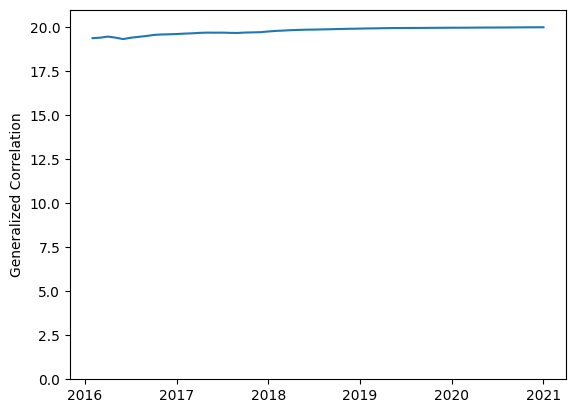

CPU times: user 13 s, sys: 5.38 s, total: 18.3 s
Wall time: 37.9 s


In [10]:
%%time 

plot = section_4.GenCorr()
plot.setup(percentile_rank_chars, return_panel, dates)
plot.run()

## Figure D.6: Composition of Proxy Factors by Characteristic Categories

This figure shows the global factor loadings on the characteristics for the first six factors. The loadings are colored by
the category to which the characteristic belongs. The sparse approximation is based on a group lasso.

#### NOTE: our implementation uses the Gurobi solver, which is not publically available. This implementation uses the SCS solver, thus the results are different as expected

CPU times: user 40.2 s, sys: 5.13 s, total: 45.3 s
Wall time: 34.7 s

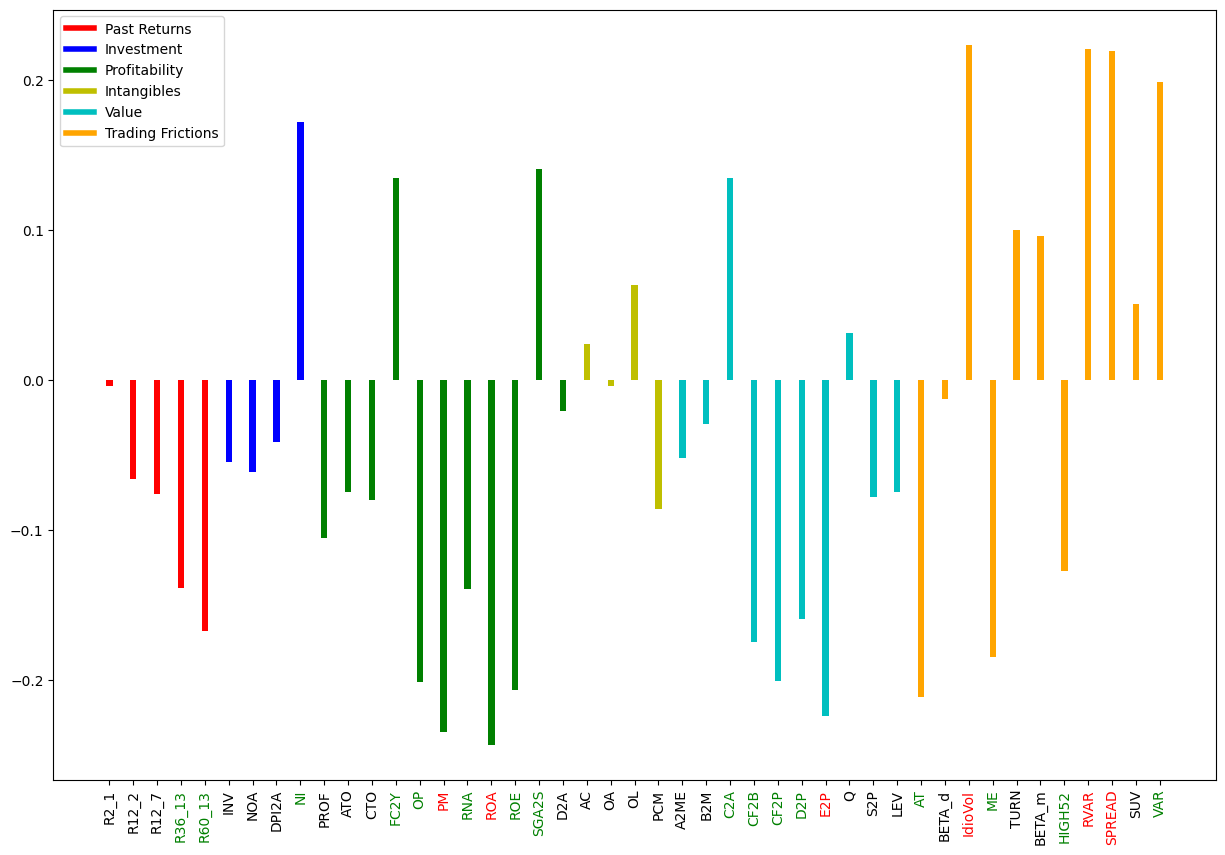

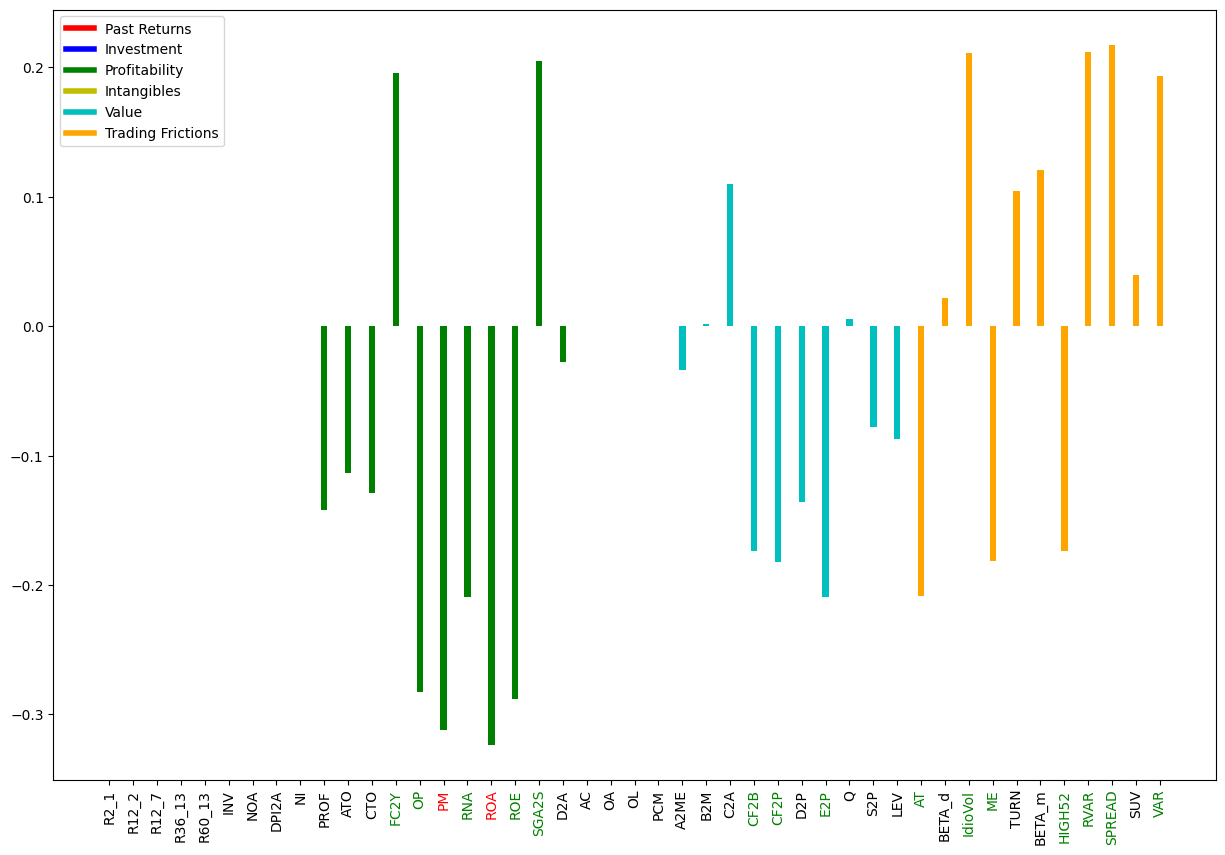

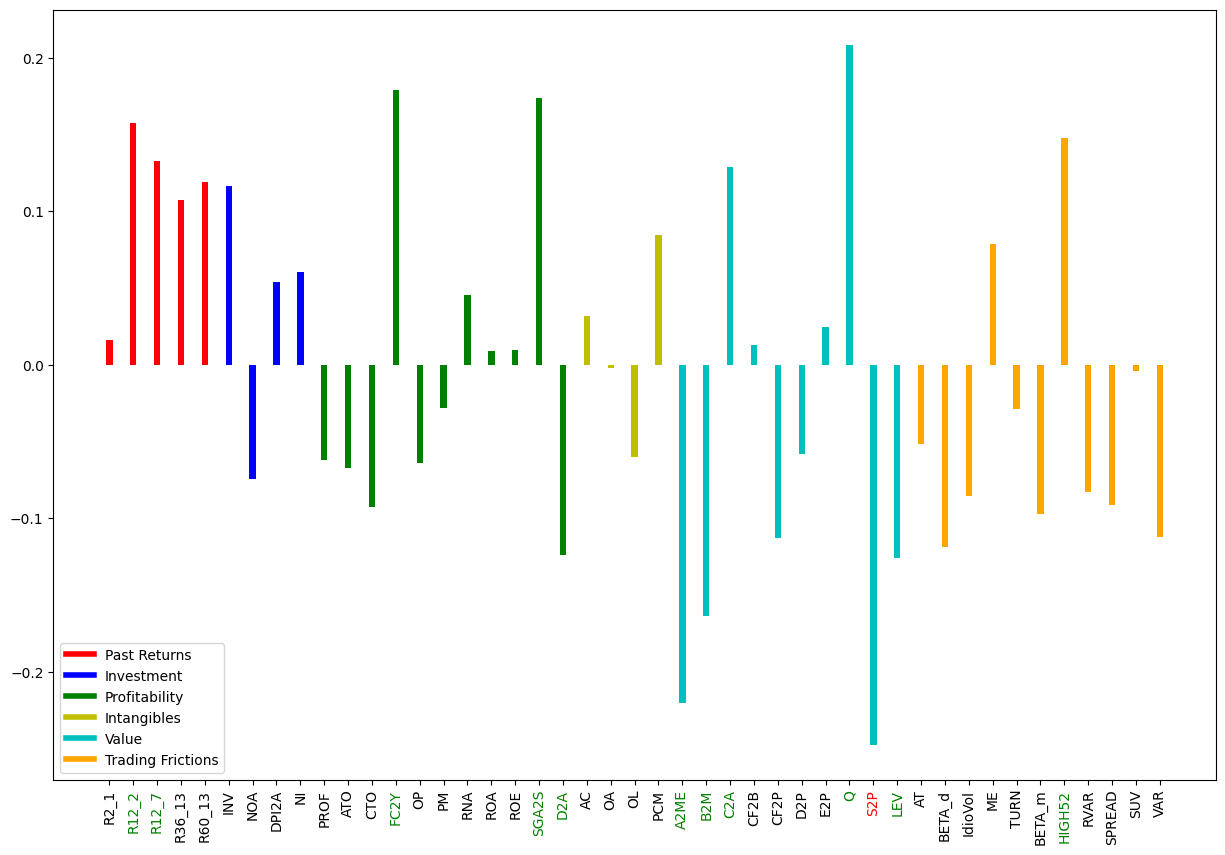

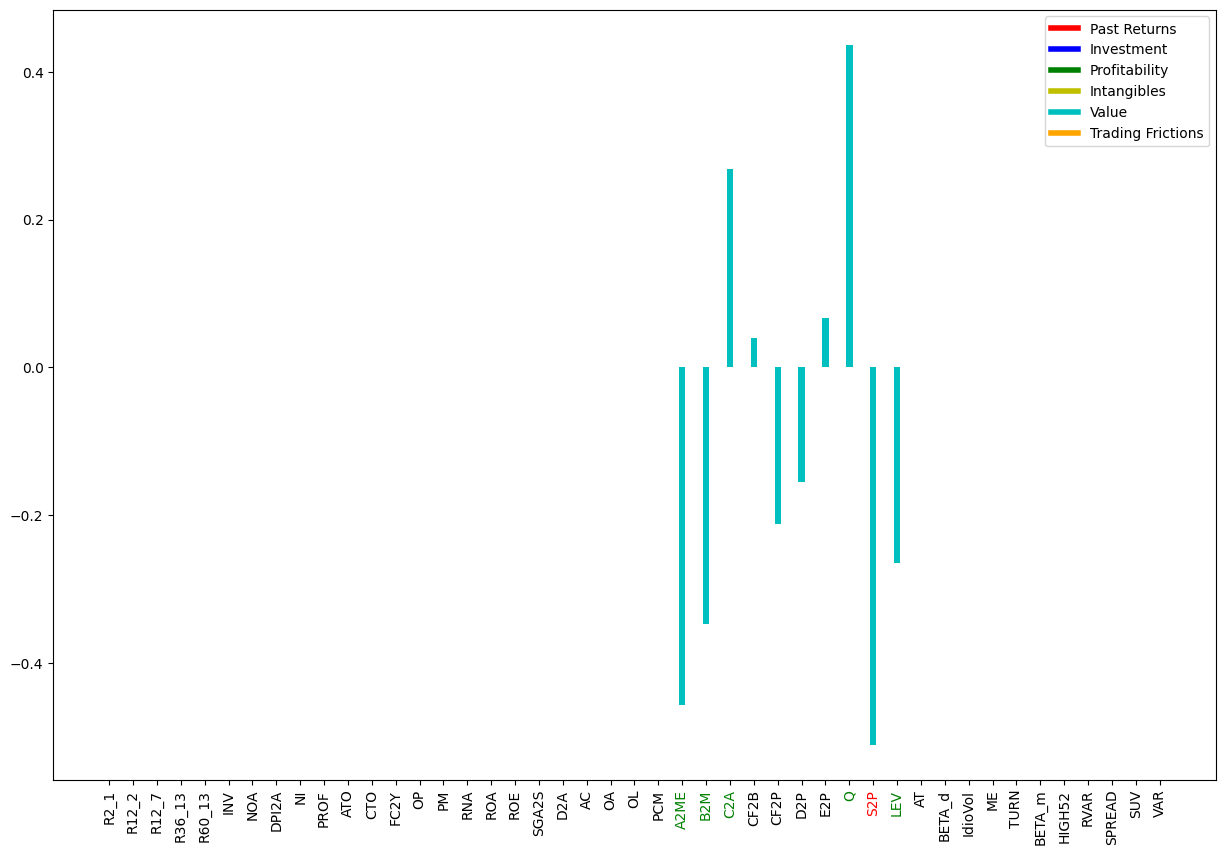

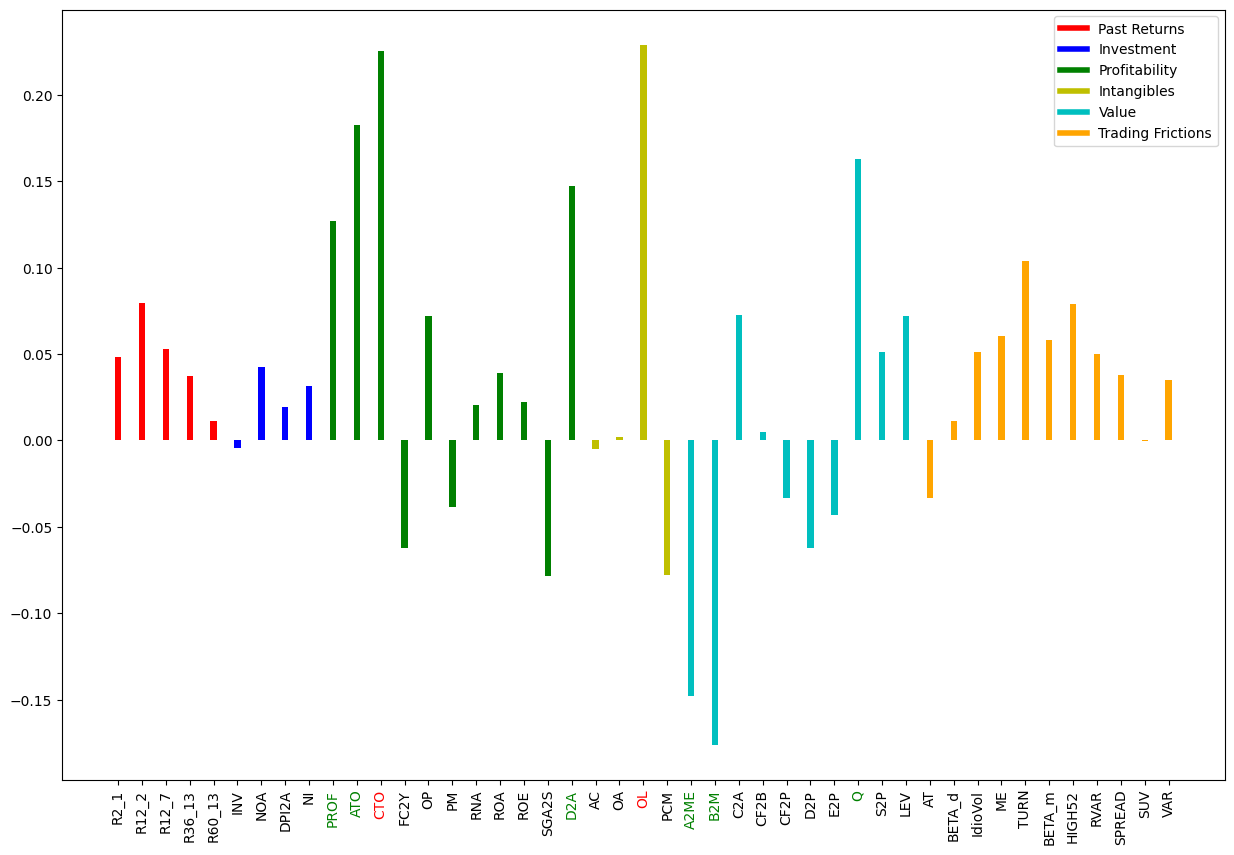

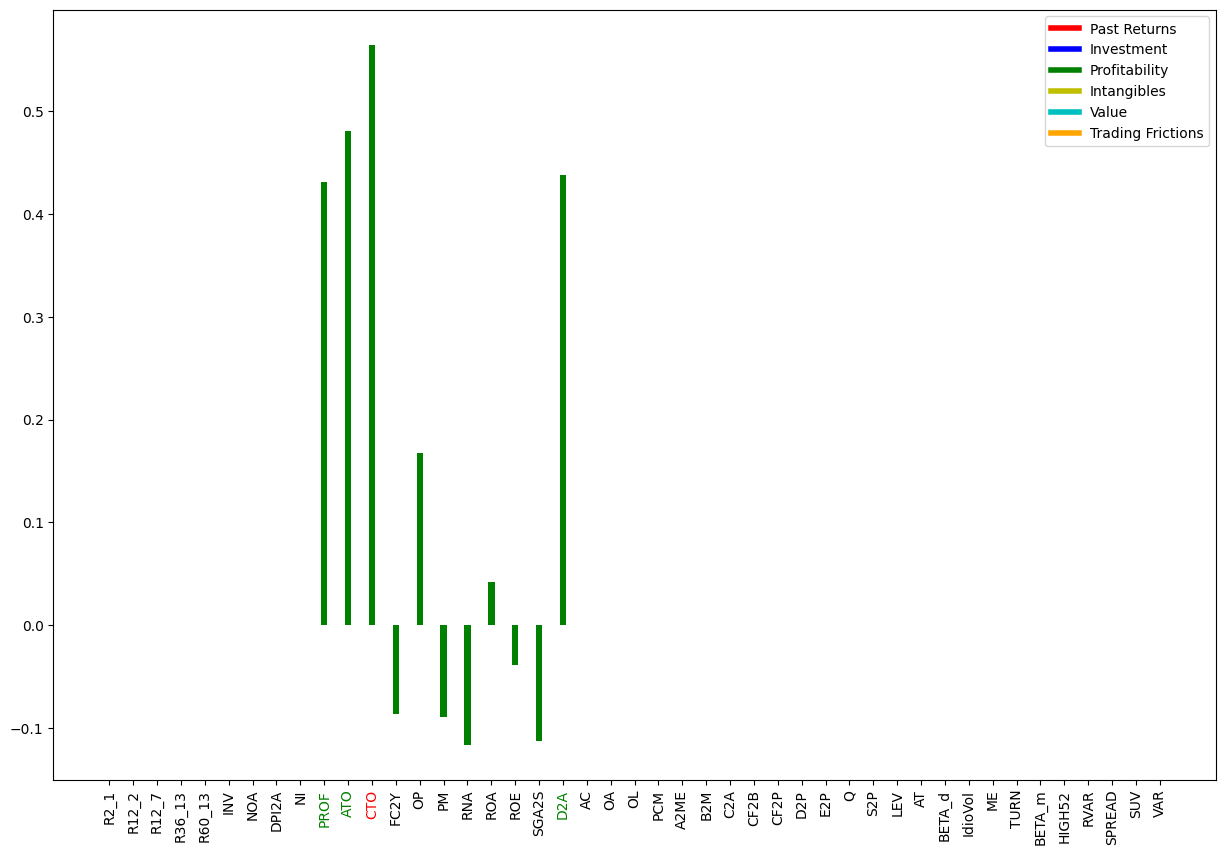

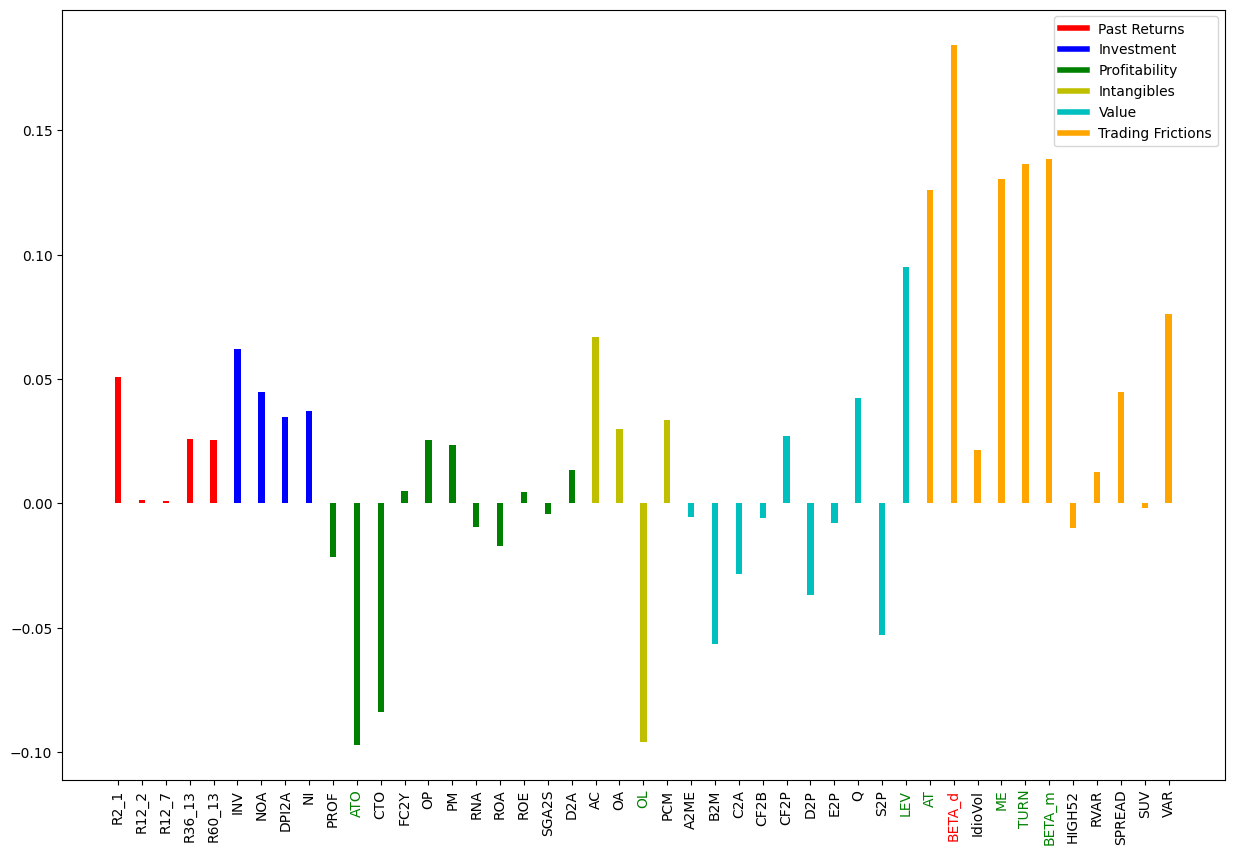

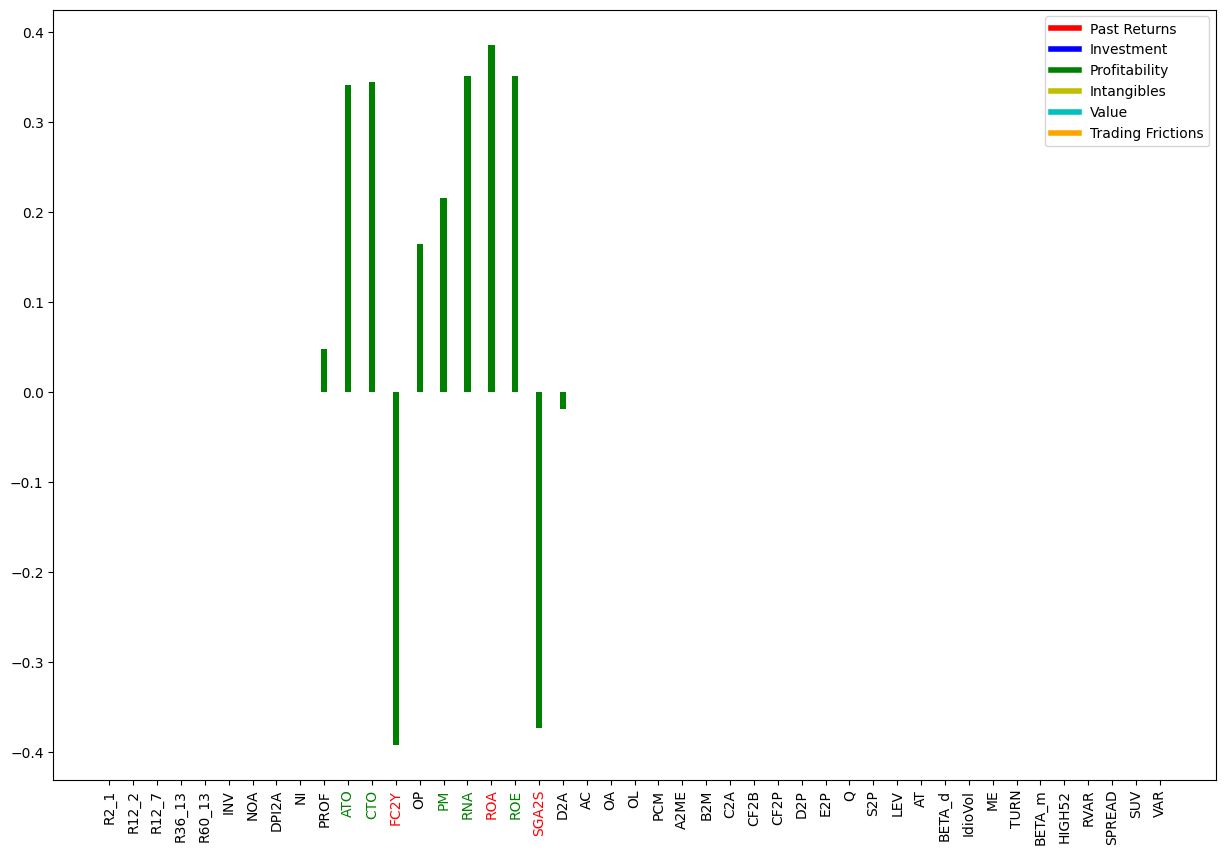

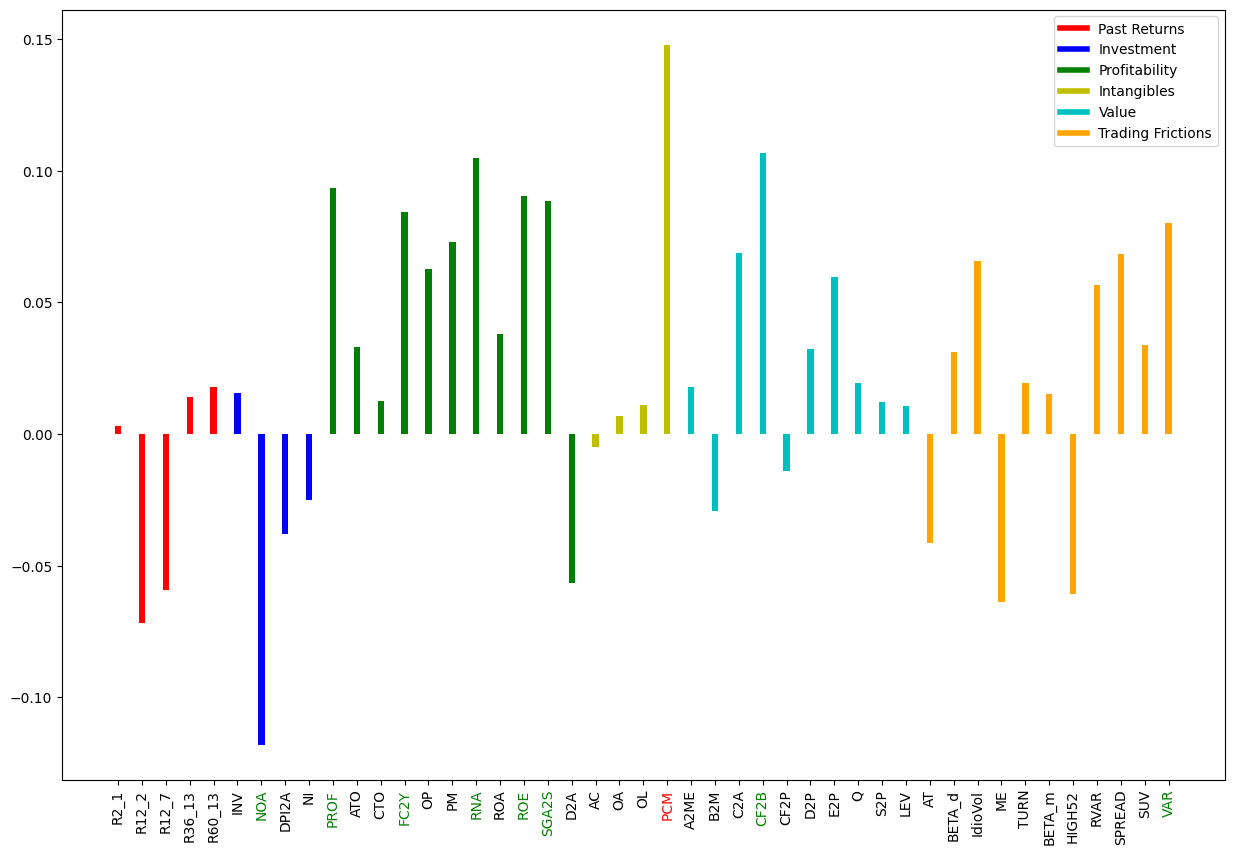

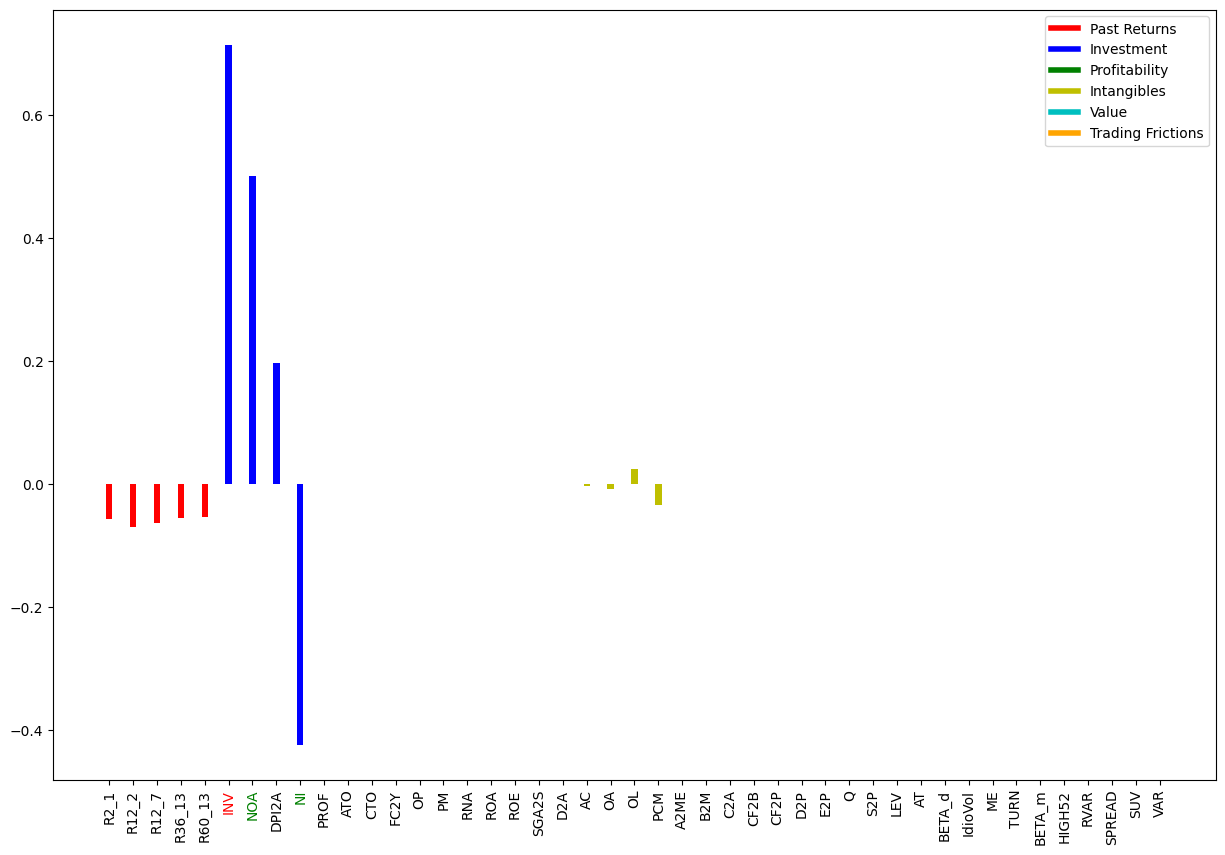

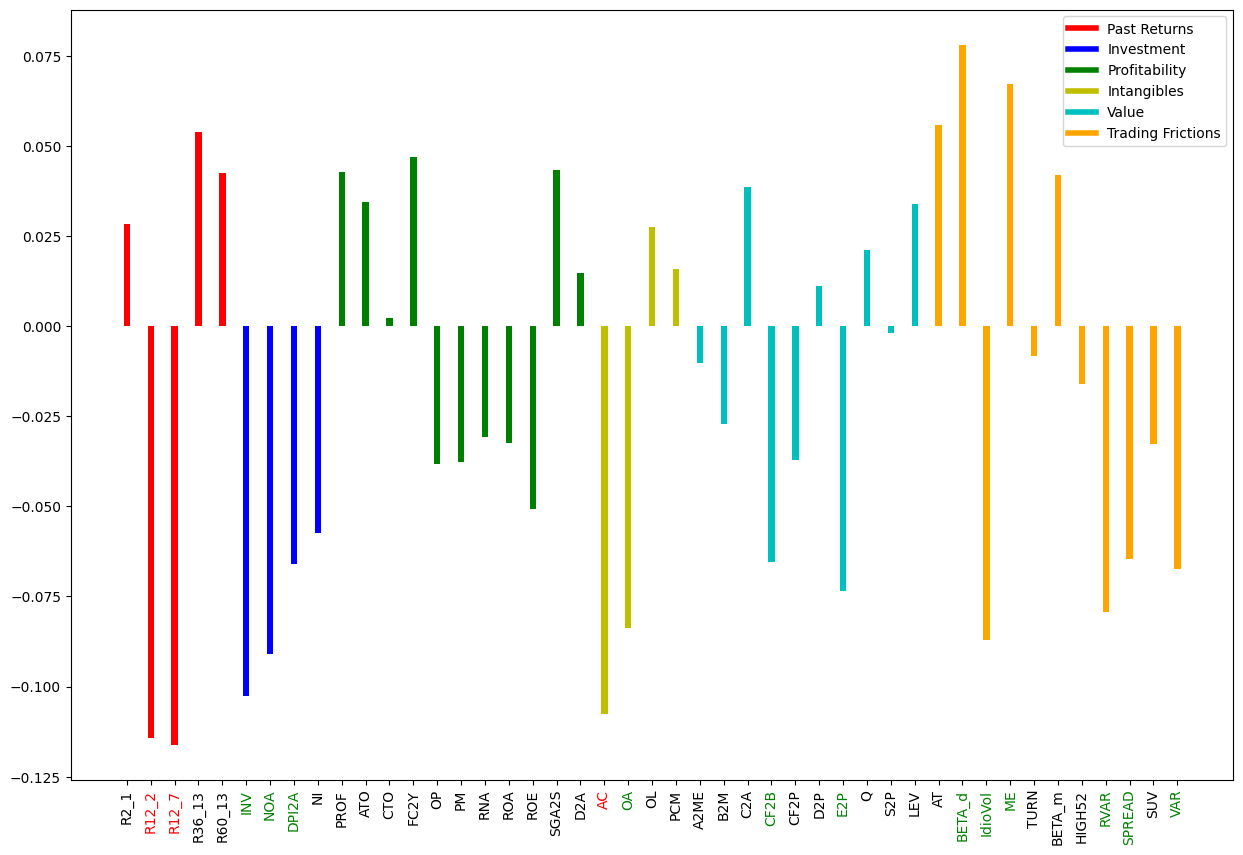

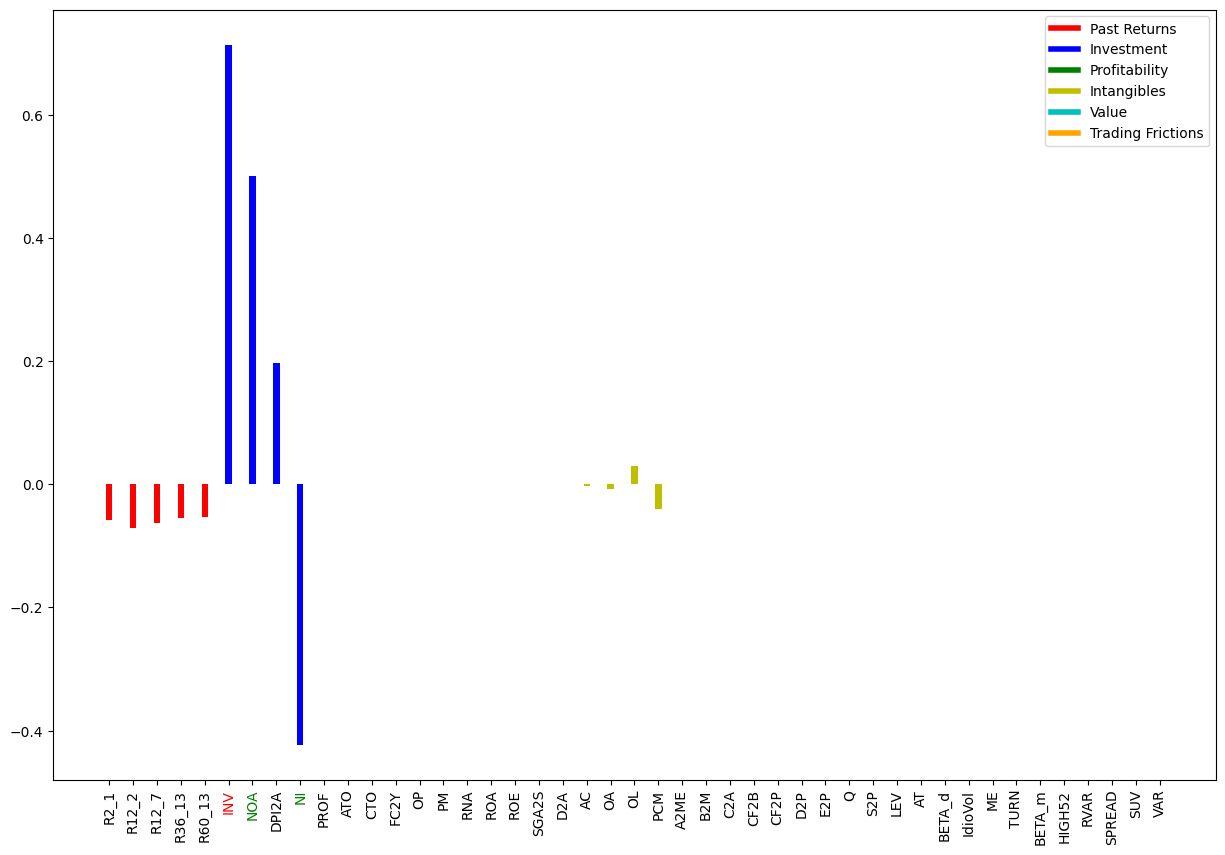

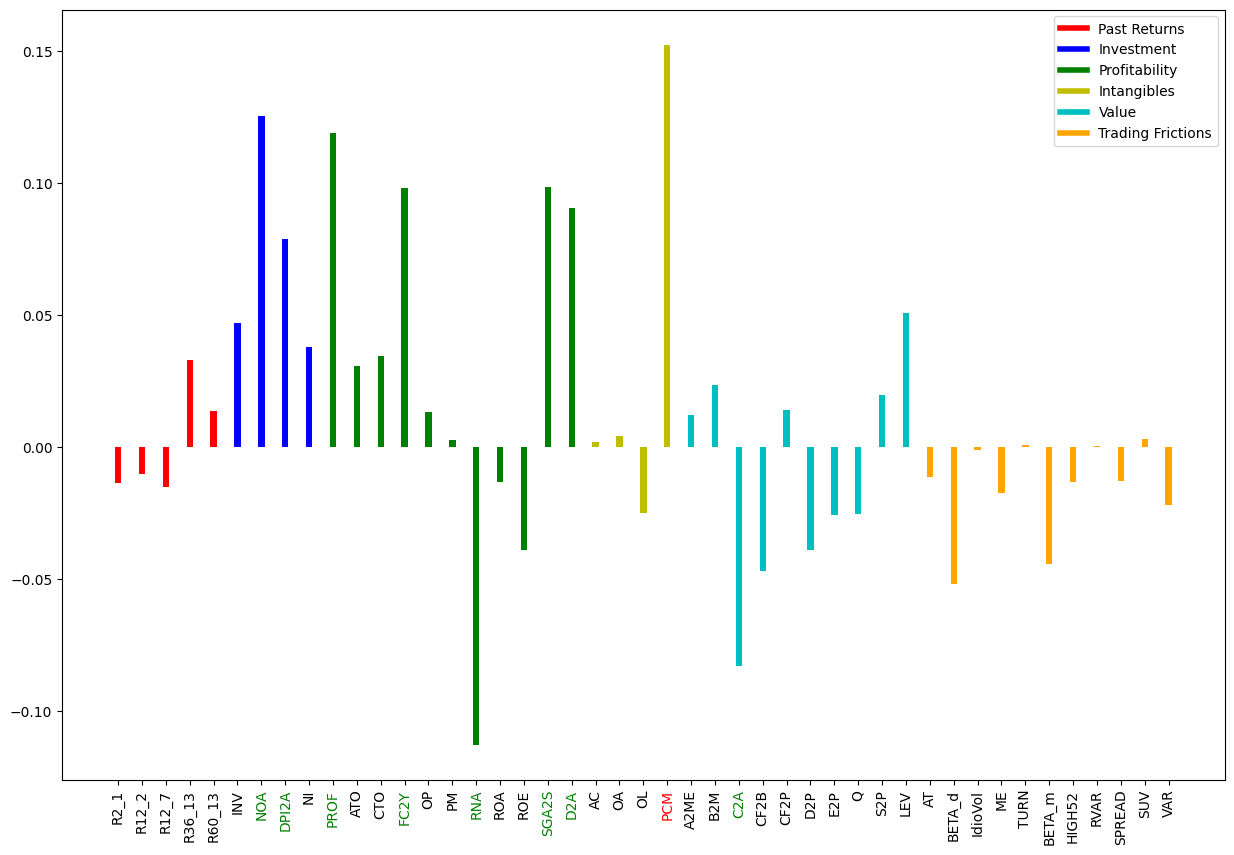

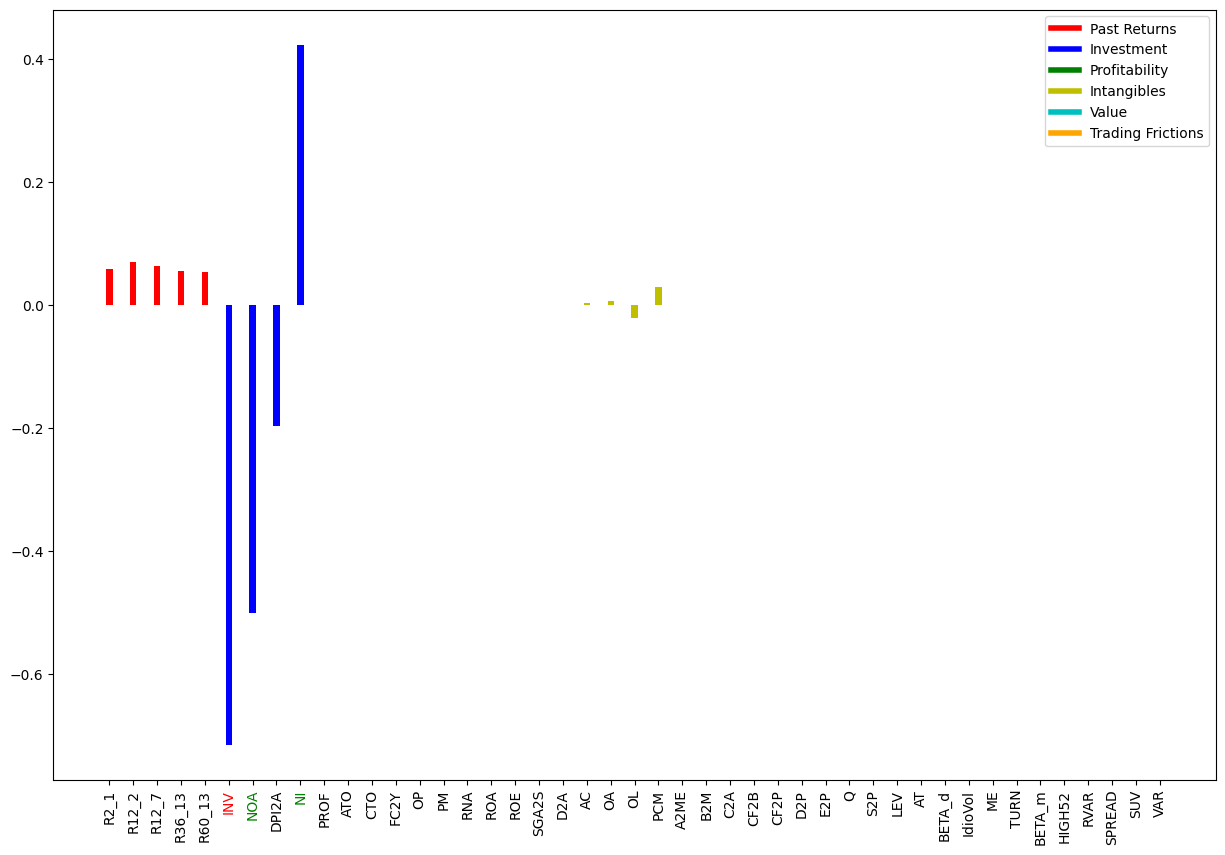

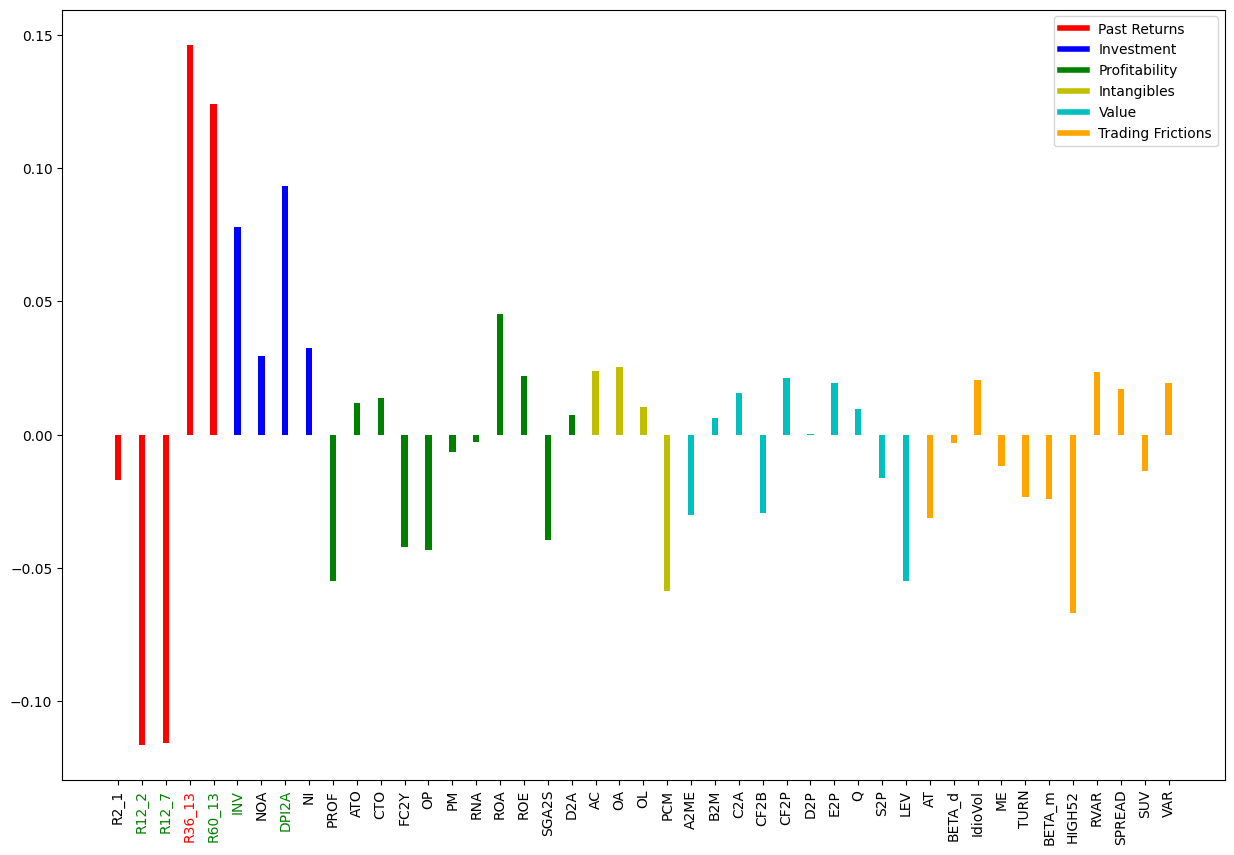

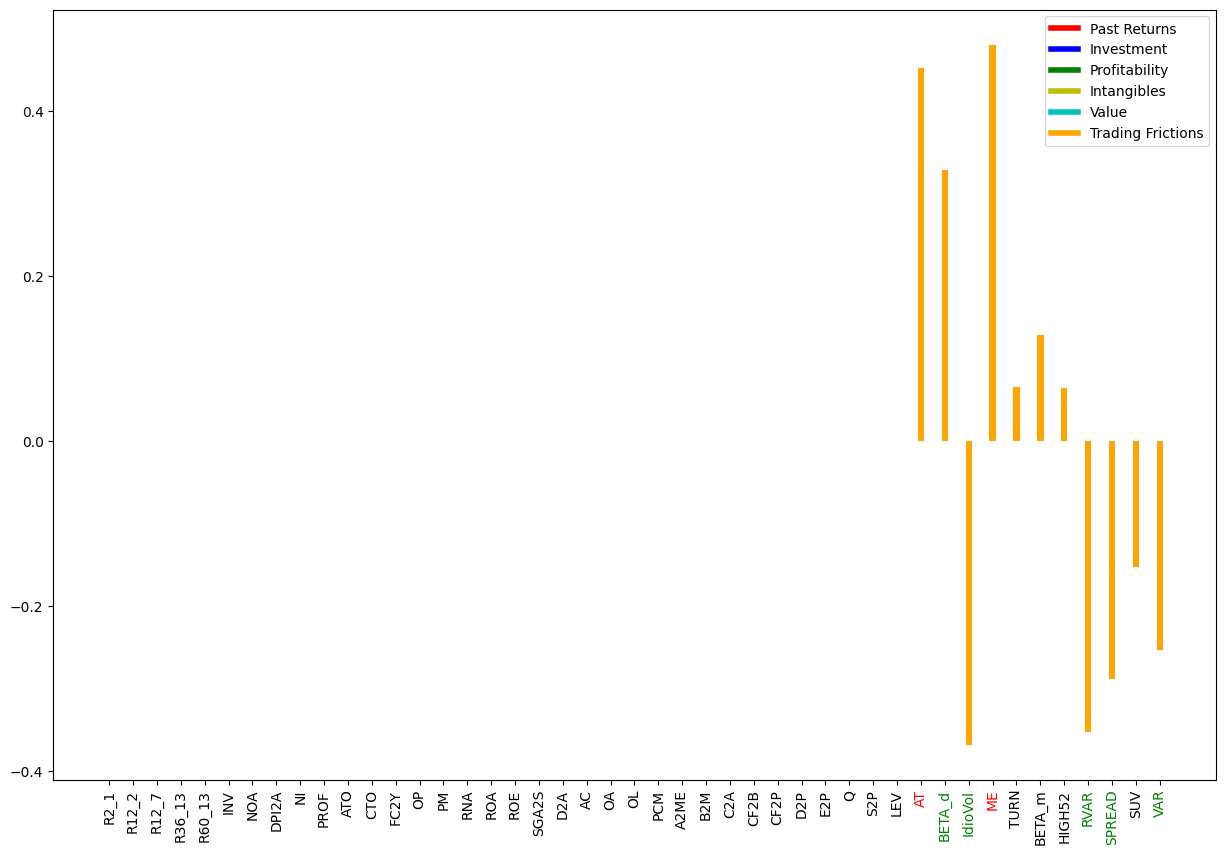

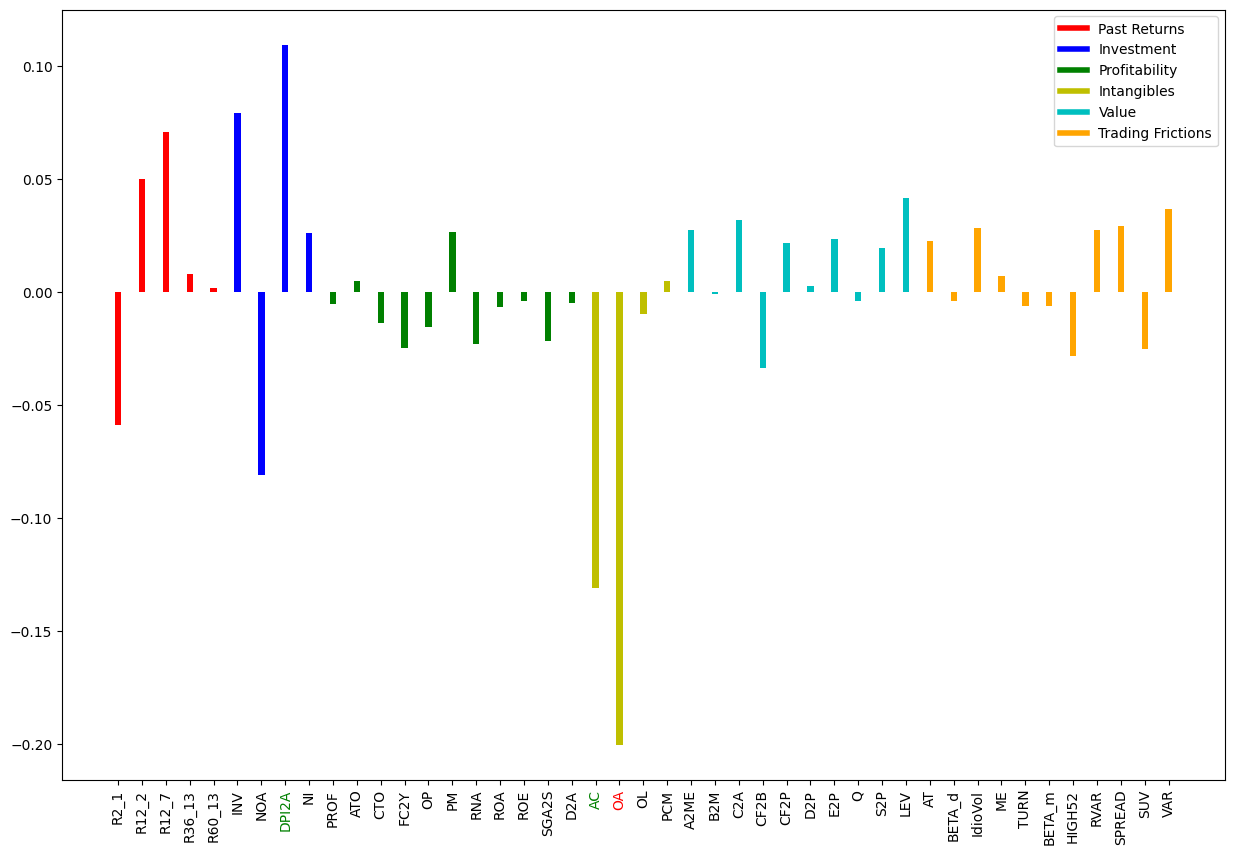

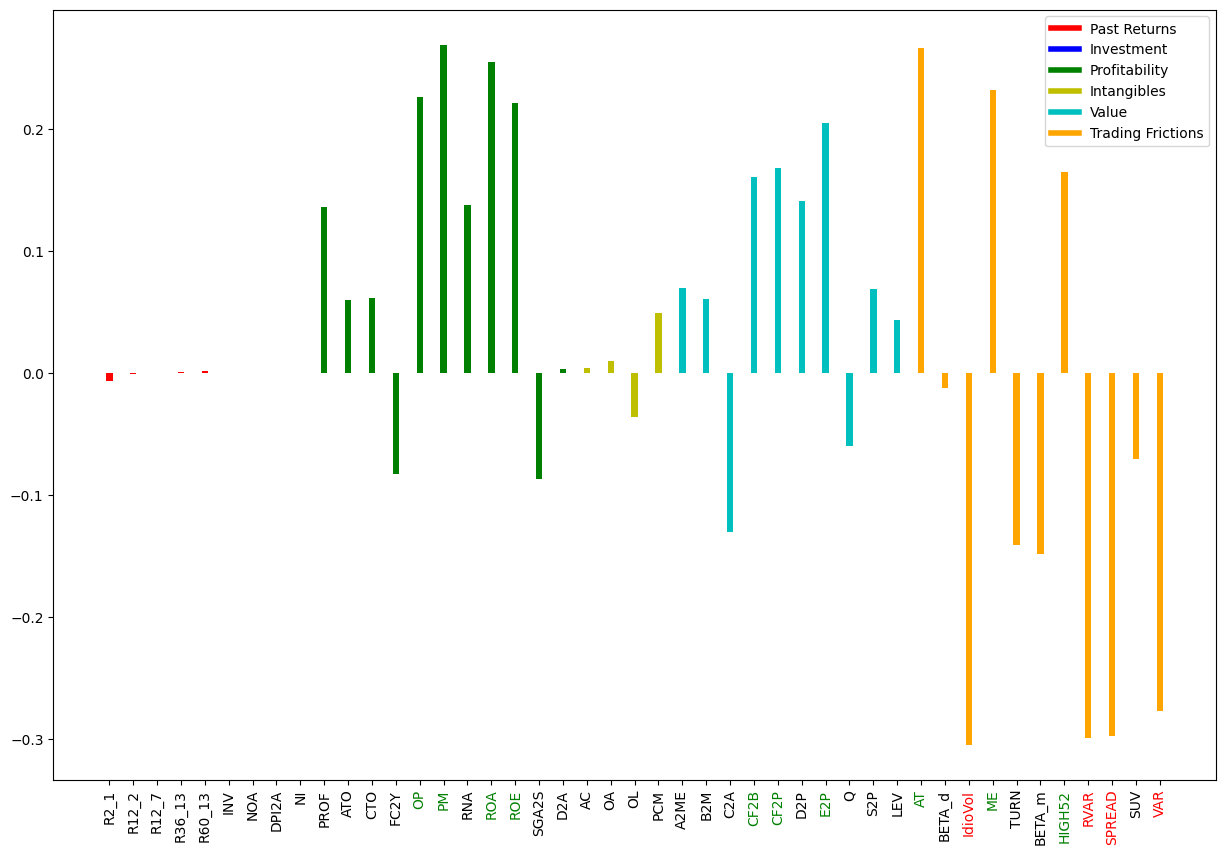

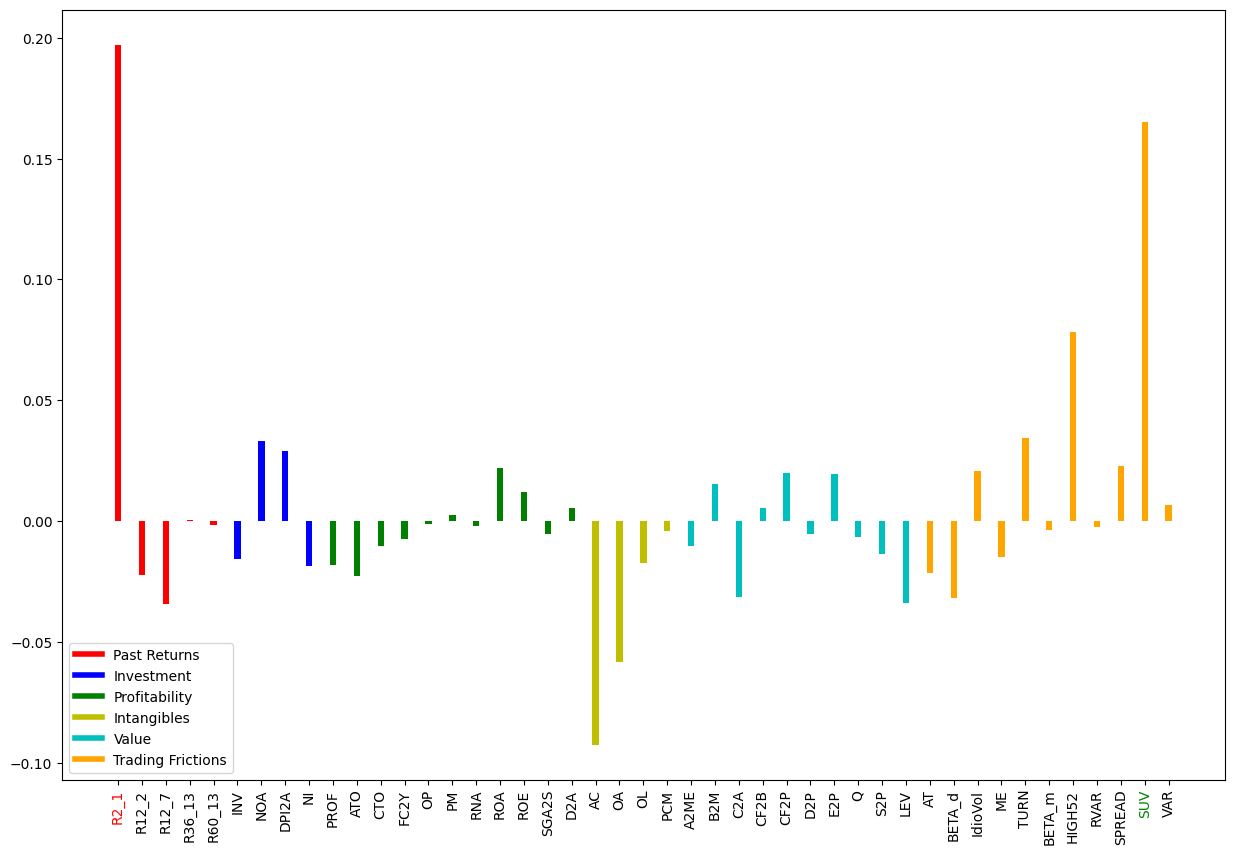

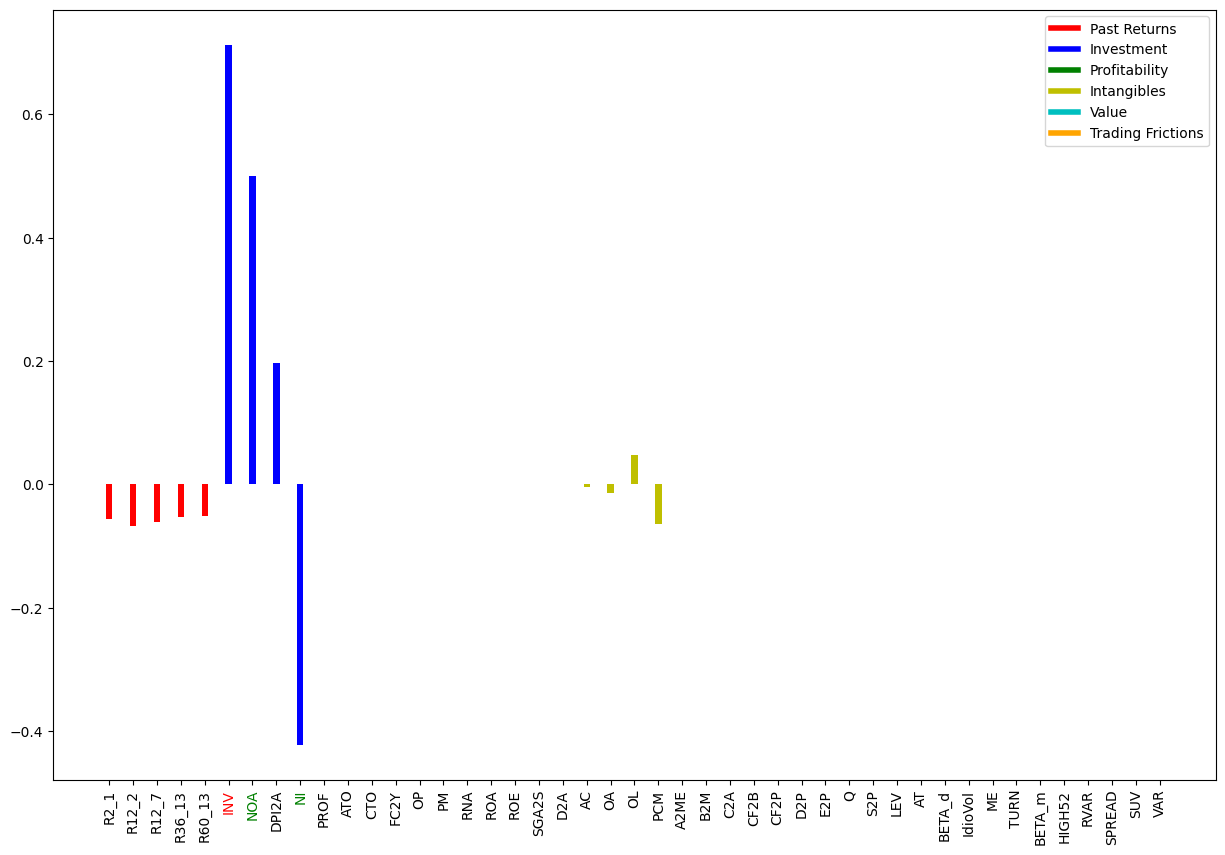

CPU times: user 40.2 s, sys: 5.13 s, total: 45.3 s
Wall time: 34.7 s


In [11]:
%%time 

result = appendix.SparseFactors()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates)

## Figure D.8: Global and Local Imputation for Individual Characteristics

This figure shows the imputation RMSE by imputation method across individual characteristics. The characteristics are
sorted in ascending order based on the time-series standard deviation of characteristics. We report the imputation error
out-of-sample for masked characteristics from all observed data for the block-masking scheme. We use the fallback
method as indicated in Table 3, when a method is not applicable.

CPU times: user 1min 39s, sys: 29.1 s, total: 2min 9s
Wall time: 2min 10s

<Figure size 640x480 with 0 Axes>

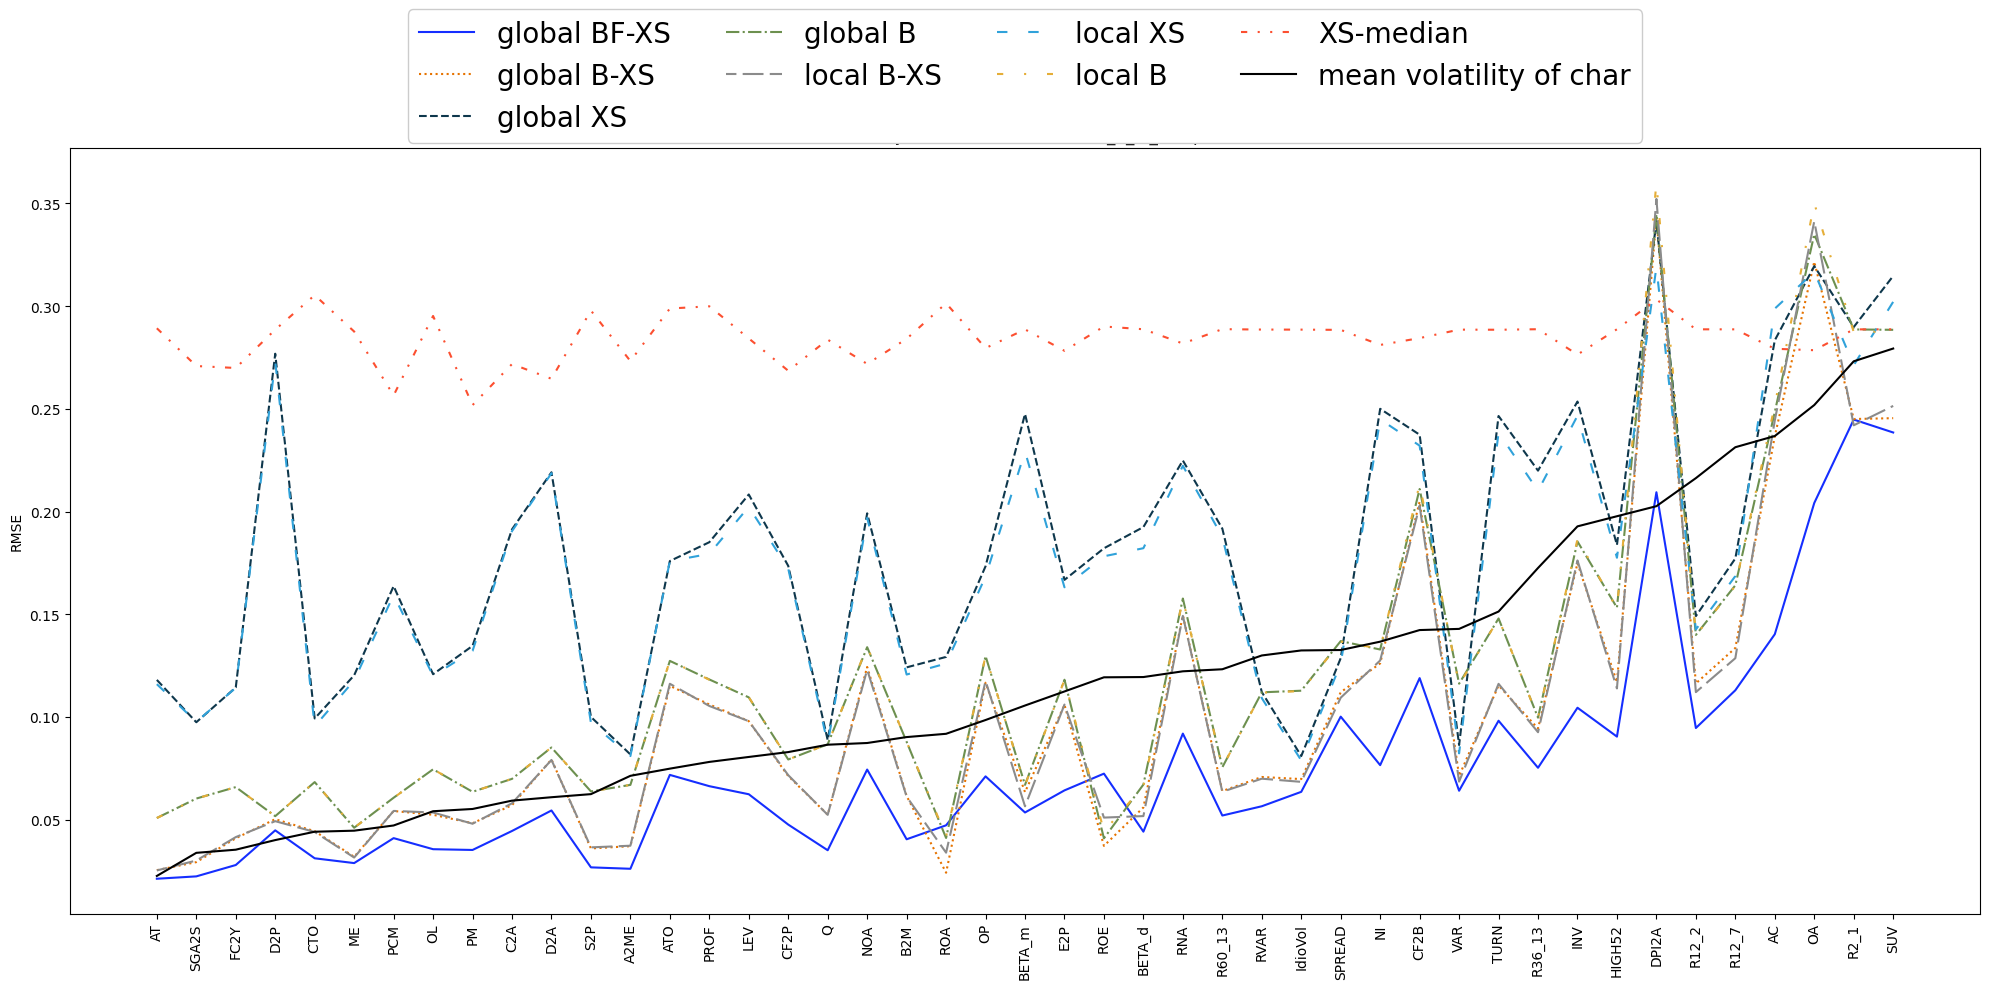

<Figure size 640x480 with 0 Axes>

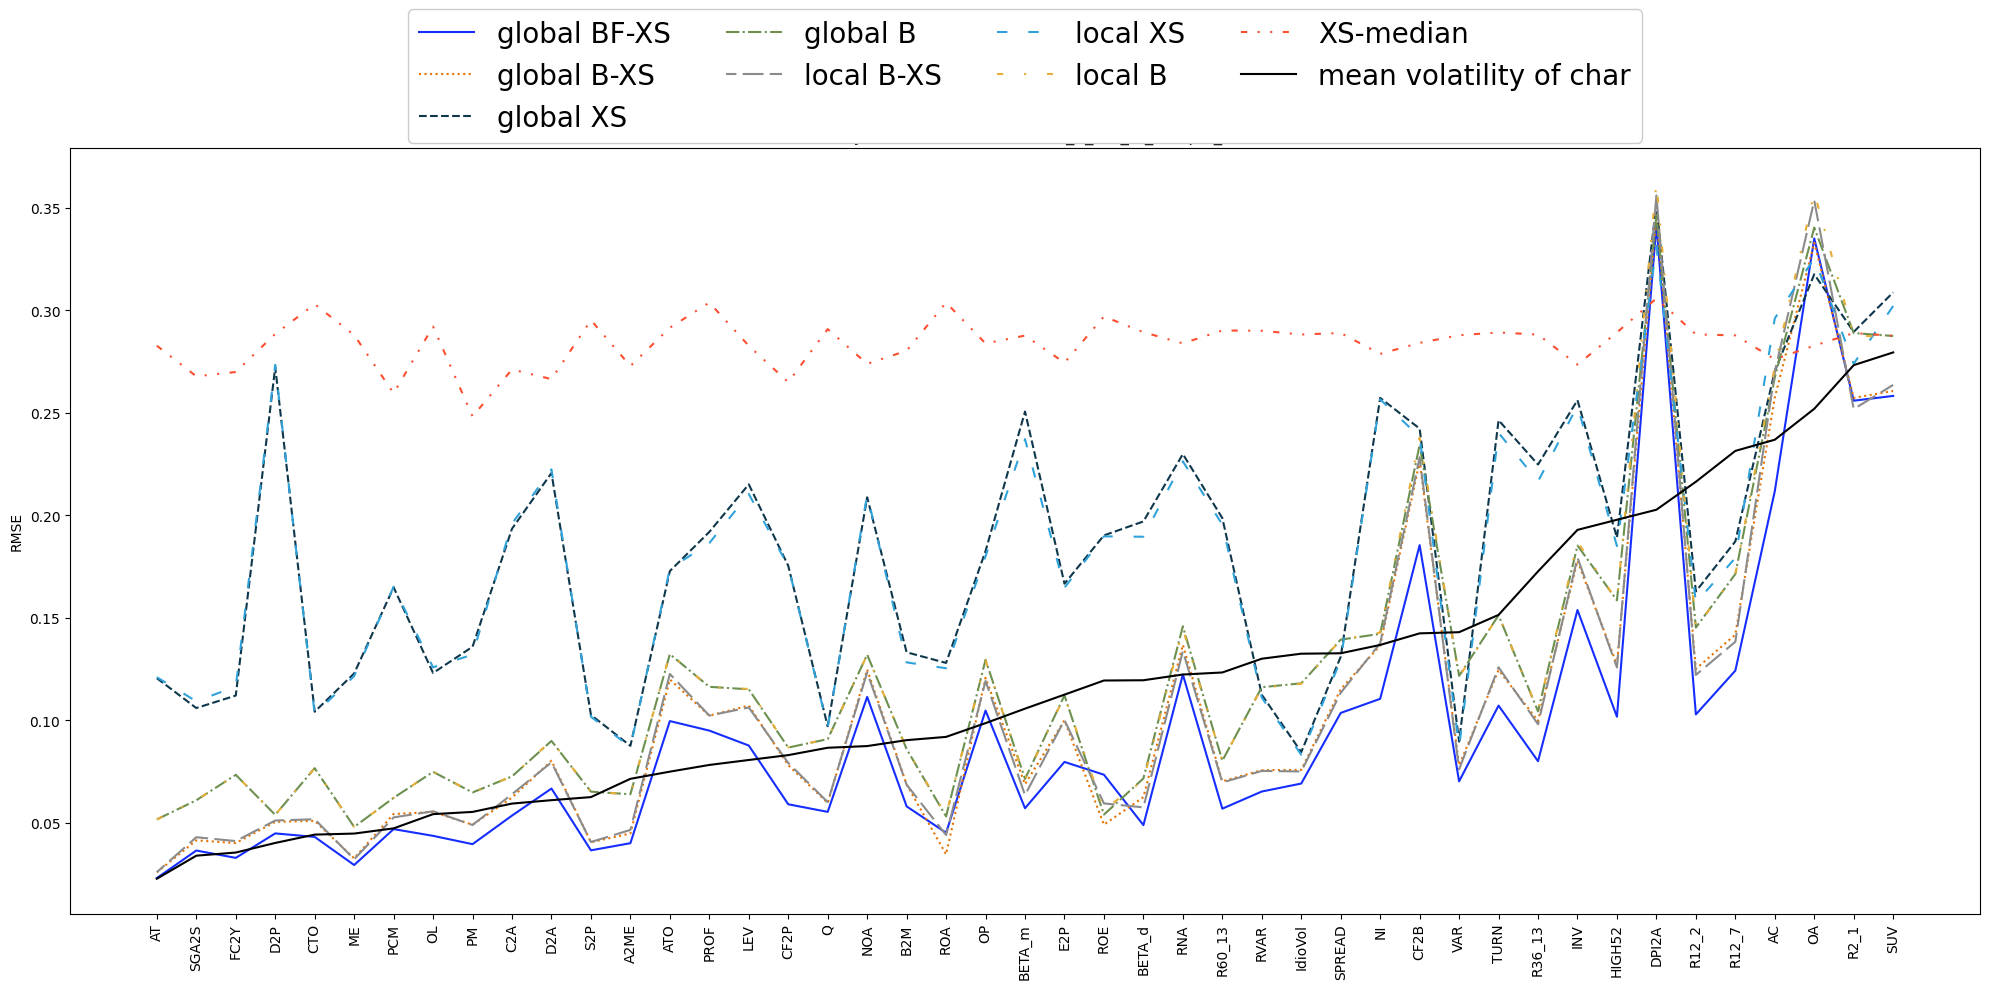

<Figure size 640x480 with 0 Axes>

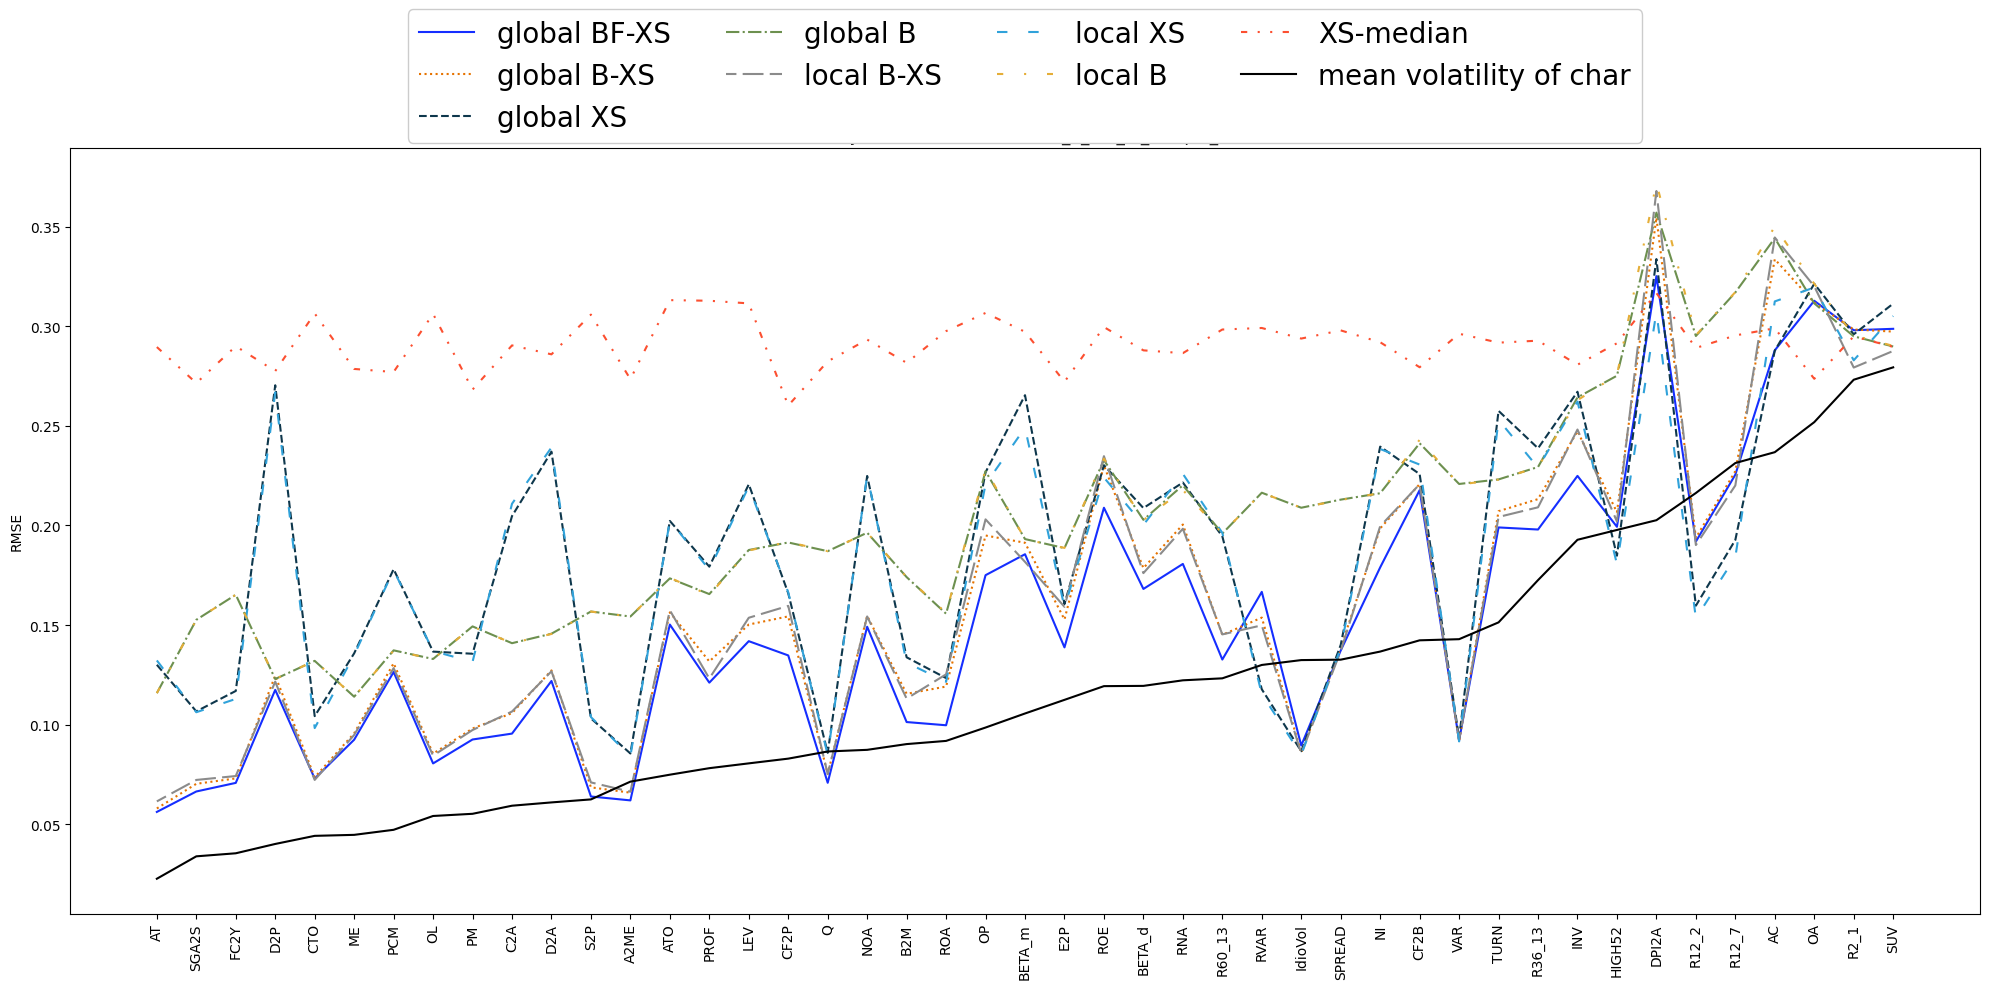

<Figure size 640x480 with 0 Axes>

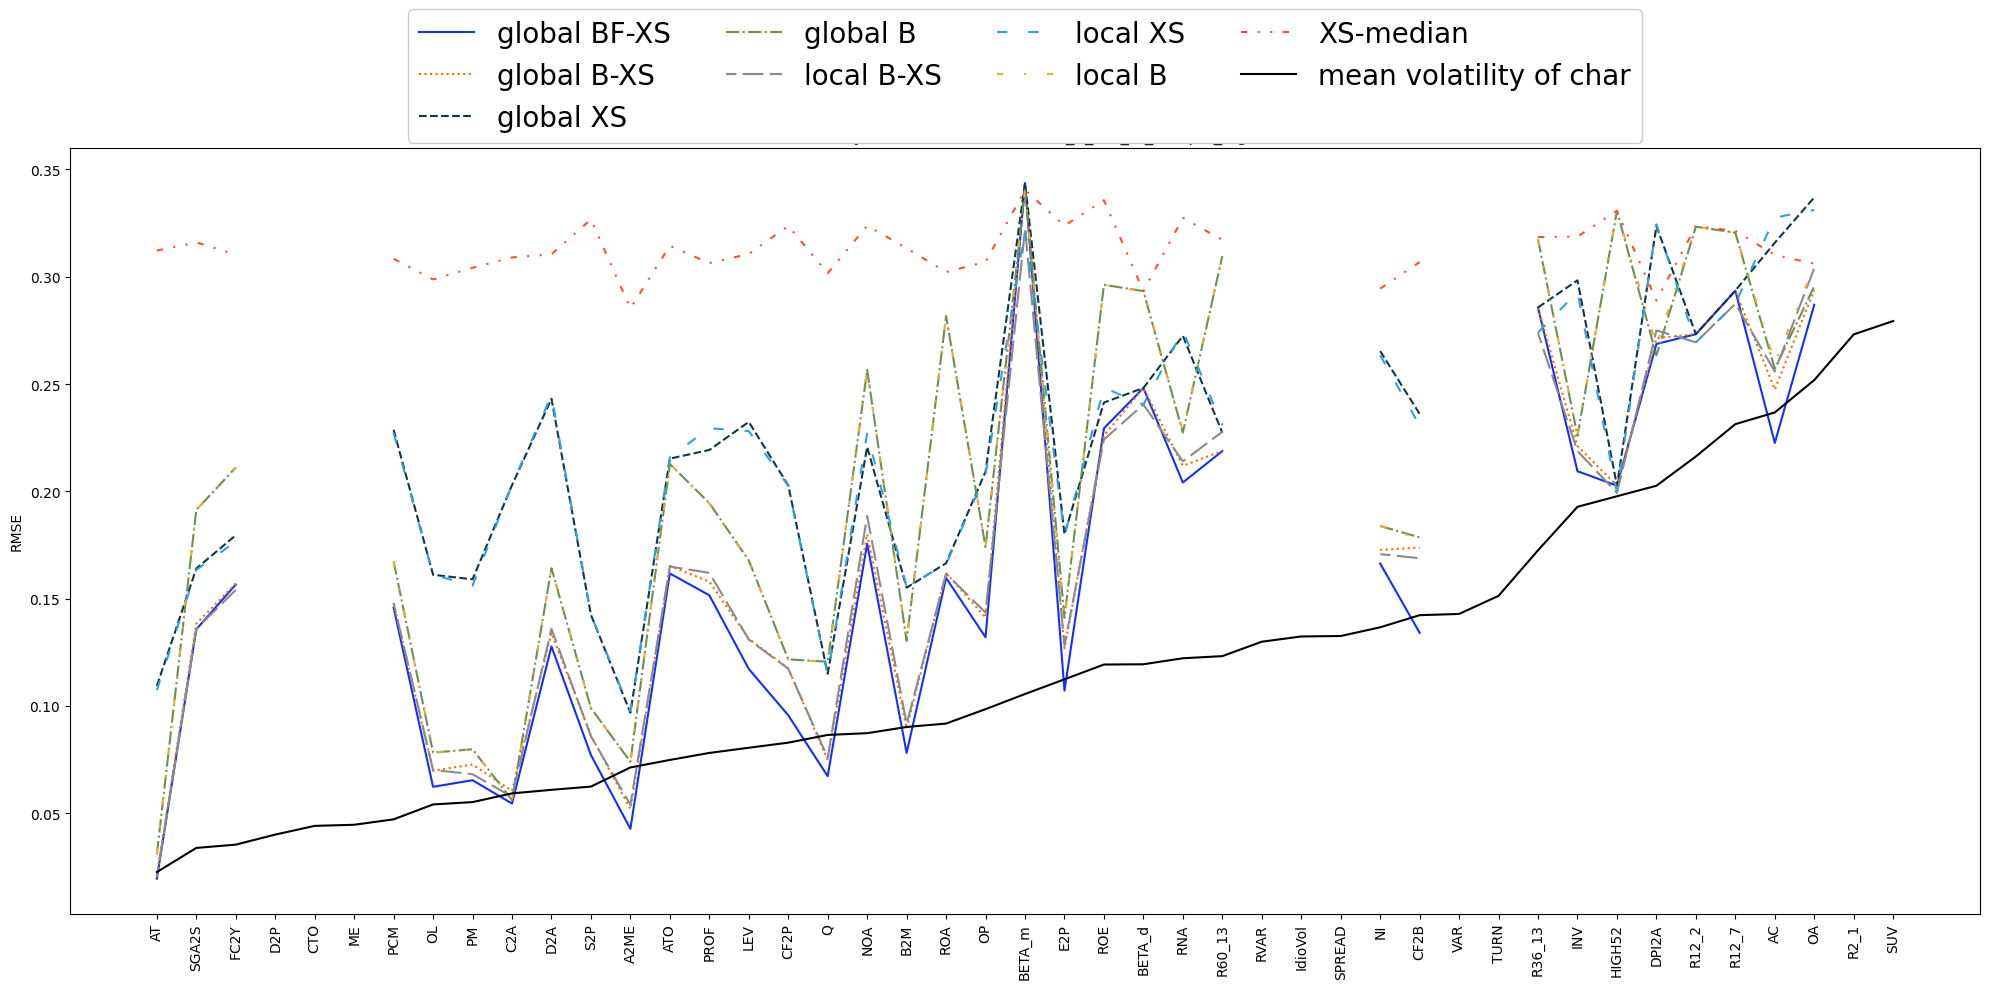

CPU times: user 1min 39s, sys: 29.1 s, total: 2min 9s
Wall time: 2min 10s


In [15]:
%%time 

plot = section_5.ImputationErrorPlots()
plot.setup(percentile_rank_chars, chars, monthly_updates, dates, plot_over_time=False, table_1=False)
plot.run()

## Figure D.9: Top and Bottom Deciles with and without Missing Values

This figure shows the Sharpe ratios and average returns for value-weighted decile-sorted portfolios formed from stocks with observed single or full panel of characteristics. The left set of plots shows the Sharpe ratios of the top and bottom deciles, while the right set of plots shows the mean returns. The light blue and green bars correspond to the first and last deciles, comprised of a fully observed panel of stocks with all the characteristics. The dark blue and green bars correspond to the return on the extreme deciles formed by stocks required to have only the characteristic available used in sorting.

CPU times: user 18.1 s, sys: 2.03 s, total: 20.2 s
Wall time: 16.5 s

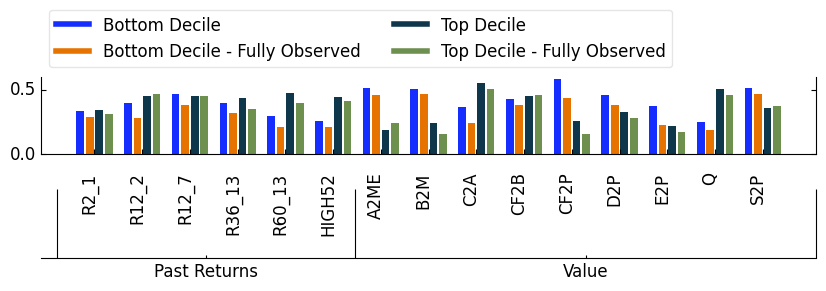

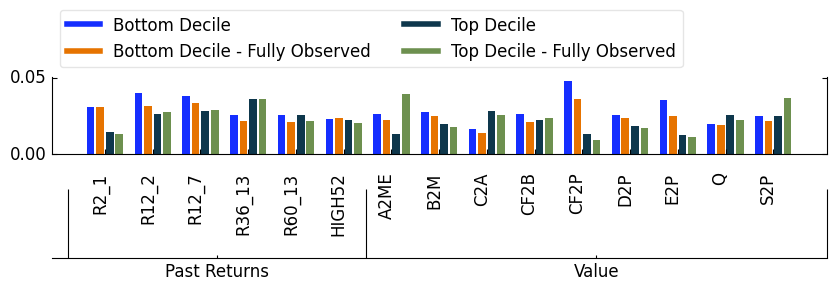

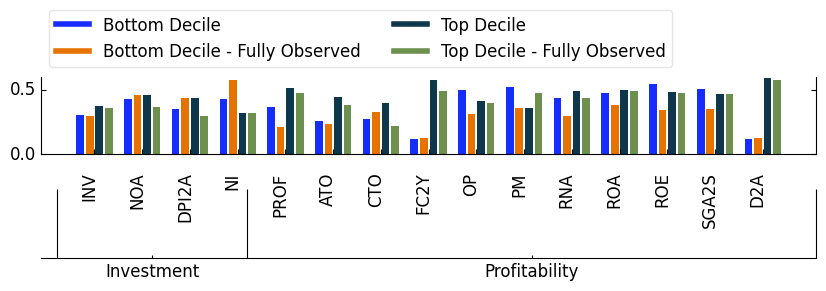

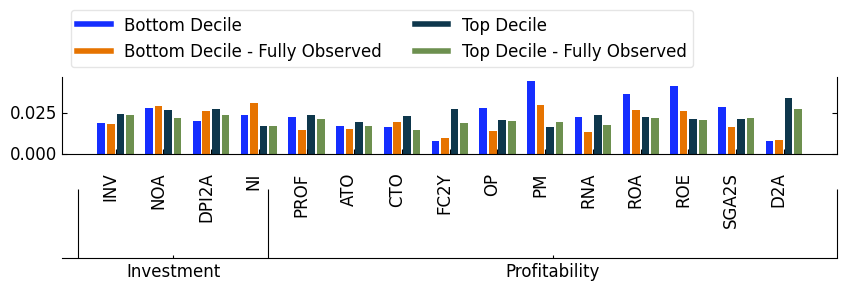

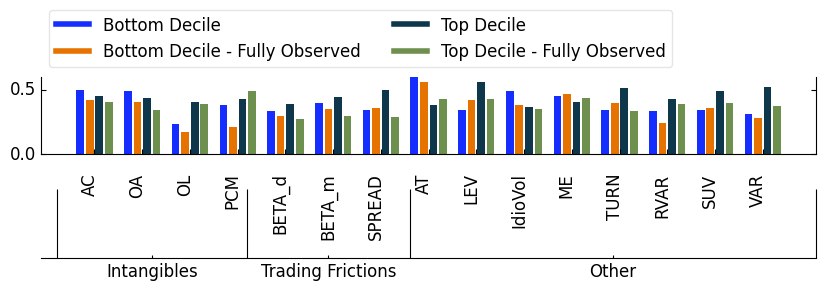

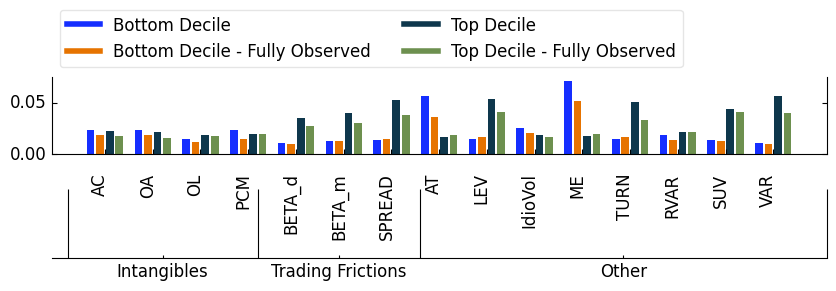

CPU times: user 18.1 s, sys: 2.03 s, total: 20.2 s
Wall time: 16.5 s


In [13]:
%%time 

size_ind = np.argwhere(chars == 'ME')[0][0]
plot = section_6.UnivariateBarDiffs()
plot.setup(percentile_rank_chars, chars, return_panel,
        regular_chars, dates, permnos)
plot.run()

## Figure D.10: Sharpe Ratios with Non-parametric IPCA Factors

This figure shows the in- and out-of-sample Sharpe ratios of mean-variance efficient combination for different number
of IPCA factors. We estimate a conditional latent factor model with the Instrumented Principal Component Analysis of
Kelly et al. (2019). We generalize IPCA to a nonlinear conditional factor model by considering for each characteristic 10
basis functions based on indicator functions for cross-sectional deciles. This corresponds to a kernel approximation of
a non-linear loading function. The estimation is either on the smaller subset of fully observed or the larger set of all
imputed stocks. The in-sample analysis is estimated on the full time period, while the out-of-sample analysis estimates
the loadings and mean-variance efficient weights on the first half of the time-series and evaluates the portfolios on the
second half.

CPU times: user 51min 1s, sys: 3min 7s, total: 54min 8s
Wall time: 21min 45s

fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.06139237950298104 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 253.31it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.0035440524799466022 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 105.13it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.06200552970467932 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 286.14it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.02071415114385855 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 102.63it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.17309036544837209 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 282.62it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.13246157842294087 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 100.50it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.646070734184027 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 274.43it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.07288282063494064 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 99.64it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.22986524465767655 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 283.97it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.06087480942111545 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 98.21it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.24049831112382924 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 276.36it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.10770347820470866 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 85.26it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1
The panel dimensions are: 
n_samples: 1358 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.20527392591867533 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 291.26it/s]


fitting on the train data
1e-05
the maxiter are 10
10
l-1


The panel dimensions are: 
n_samples: 4677 , L: 450 , T: 30


[===================================================================================================================================================================================================] 100%


stop 11 - Aggregate Update: 0.3010877234140469 - my itertol is: 1e-05 - my maxiter is: 10
l-2
fit the train data, fittings the out of sample data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 98.19it/s]


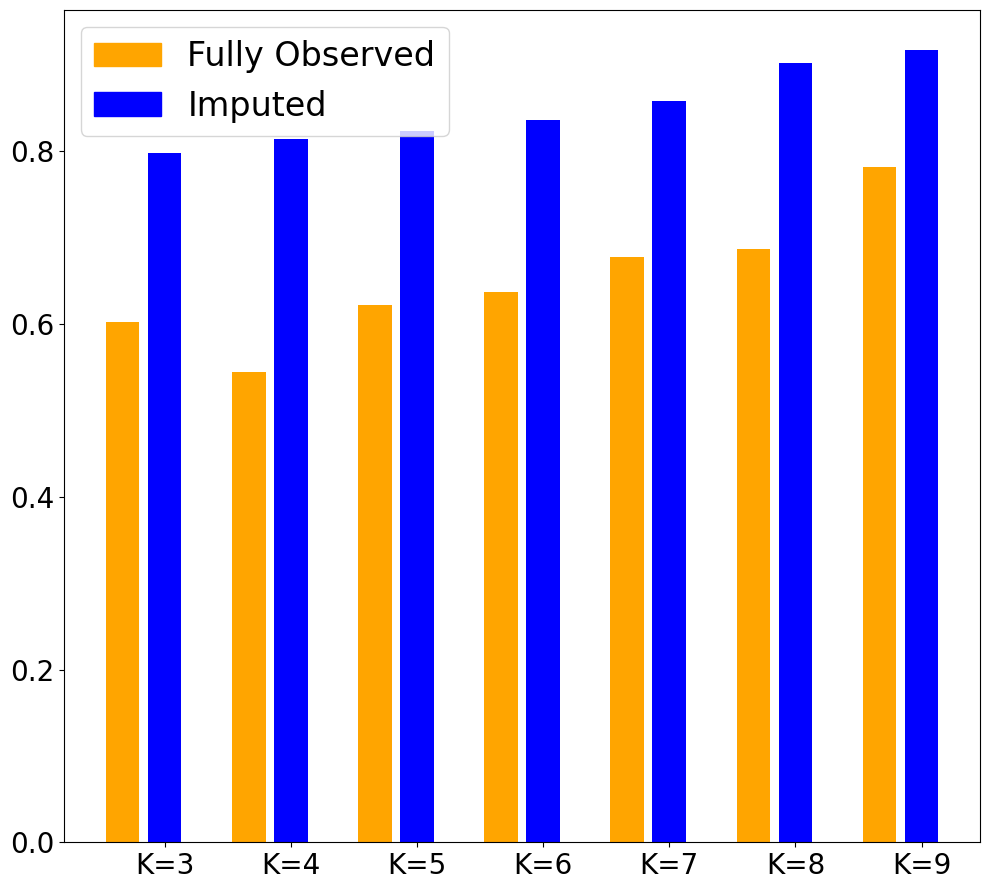

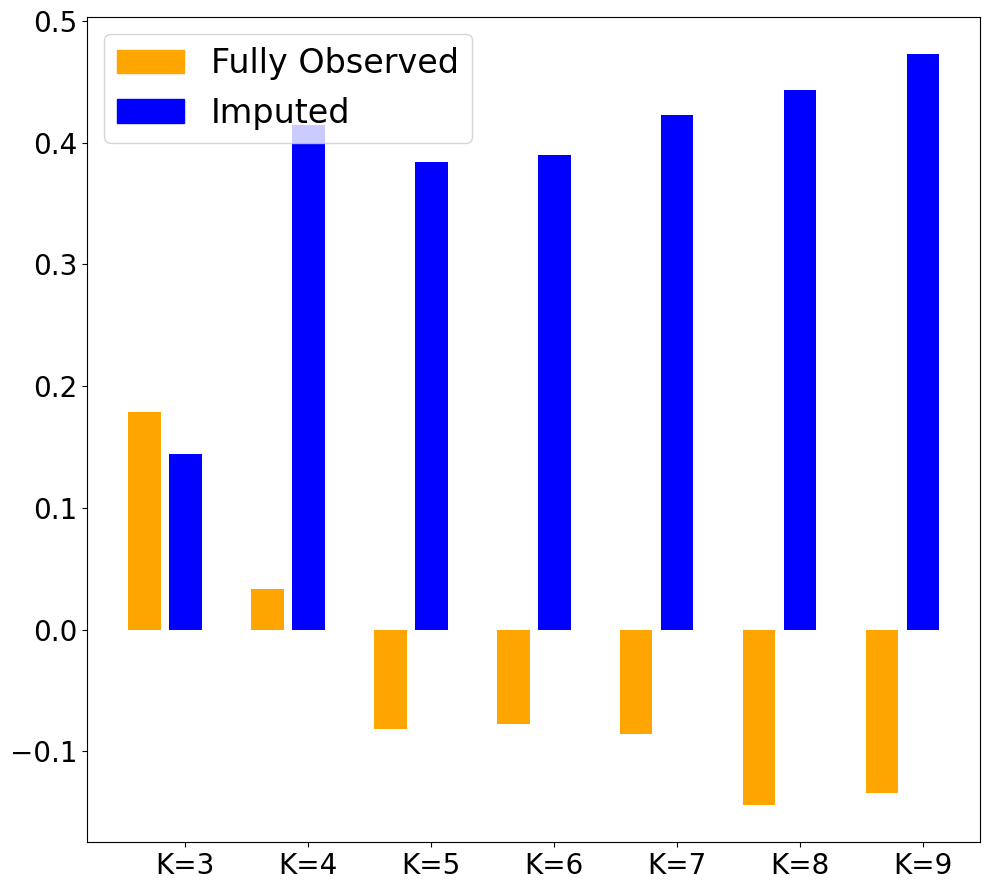

CPU times: user 51min 1s, sys: 3min 7s, total: 54min 8s
Wall time: 21min 45s


In [14]:
%%time 

result = appendix.NonlinearIPCA()
result.setup(percentile_rank_chars, return_panel,
             char_groupings, chars, 
             np.array(rts), expansion_dim=10)